rethink log return, log and ln in numpy

# IMPORTS

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import imports_and_functions as fn
from imports_and_functions.packages import *

%matplotlib inline
mpl.rcParams['figure.facecolor'] = '#232323'

# DATA

In [3]:
# leading data
df = pd.read_csv('./data/zillow_raw_2021.csv')

In [4]:
df.dtypes

RegionID        int64
SizeRank        int64
RegionName      int64
RegionType     object
StateName      object
               ...   
2020-12-31    float64
2021-01-31    float64
2021-02-28    float64
2021-03-31    float64
2021-04-30    float64
Length: 313, dtype: object

In [5]:
# display dataset
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,...,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,200075.0,198830.0,198897.0,198875.0,199330.0,199883.0,199785.0,200486.0,200791.0,202185.0,203256.0,204599.0,205854.0,208337.0,209743.0,210538.0,211254.0,212008.0,214267.0,214731.0,216143.0,215848.0,217565.0,219811.0,222770.0,225601.0,229202.0,233366.0,236664.0,240139.0,242354.0,...,1017039.0,1027584.0,1038953.0,1058026.0,1062802.0,1072237.0,1070957.0,1083433.0,1078314.0,1078464.0,1069361.0,1065229.0,1083891.0,1095244.0,1116158.0,1110777.0,1110752.0,1100678.0,1081990.0,1056843.0,1052388.0,1056984.0,1068839.0,1065266.0,1064037.0,1051885.0,1033799.0,1025042.0,1023762.0,1030265.0,1044070.0,1059557.0,1067331.0,1068534.0,1069807.0,1081347.0,1081855.0,1092196.0,1104487.0,1121360.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,266953.0,266255.0,265226.0,264005.0,262194.0,261265.0,259796.0,261551.0,263668.0,268043.0,271194.0,273875.0,275390.0,276139.0,277481.0,277514.0,278723.0,278493.0,279105.0,273341.0,266862.0,256874.0,250329.0,245524.0,243611.0,243305.0,243173.0,244126.0,244968.0,246046.0,247259.0,...,500490.0,503618.0,503321.0,501952.0,501775.0,502644.0,501921.0,501393.0,501173.0,502087.0,503423.0,503898.0,501679.0,498741.0,497160.0,497229.0,497914.0,497895.0,498210.0,497380.0,495573.0,493739.0,492233.0,491211.0,491579.0,492792.0,495301.0,496676.0,497142.0,497434.0,498824.0,500922.0,503725.0,506441.0,508991.0,511451.0,513654.0,515983.0,517482.0,519569.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,270721.0,270778.0,270928.0,271892.0,273296.0,274445.0,274827.0,274941.0,275373.0,276192.0,277288.0,278418.0,279930.0,282078.0,284714.0,286627.0,288259.0,290317.0,293412.0,296630.0,299798.0,302747.0,305990.0,309695.0,313155.0,315606.0,317359.0,318912.0,320546.0,322994.0,325994.0,...,1118937.0,1143405.0,1157115.0,1166380.0,1153814.0,1149301.0,1149279.0,1164975.0,1182952.0,1194928.0,1187956.0,1161743.0,1135281.0,1109912.0,1109211.0,1096399.0,1094837.0,1090185.0,1090223.0,1083327.0,1062489.0,1056177.0,1064622.0,1090206.0,1116017.0,1126414.0,1126998.0,1128540.0,1131833.0,1131653.0,1131516.0,1133589.0,1144334.0,1144987.0,1140435.0,1130923.0,1121519.0,1120821.0,1118048.0,1120428.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,202764.0,203015.0,202815.0,201613.0,200462.0,199788.0,200559.0,200243.0,199583.0,198783.0,199696.0,201400.0,203988.0,205247.0,206537.0,208768.0,211253.0,212984.0,212649.0,214817.0,217355.0,219585.0,218642.0,216914.0,214151.0,212522.0,210797.0,209847.0,208798.0,208384.0,208275.0,...,336842.0,337027.0,336740.0,337165.0,338230.0,339089.0,339159.0,339568.0,340104.0,340498.0,340884.0,340333.0,340630.0,340471.0,340445.0,339382.0,338793.0,338852.0,339754.0,340069.0,340740.0,340844.0,340833.0,340166.0,339808.0,339685.0,339983.0,340576.0,341578.0,342531.0,343268.0,344710.0,346294.0,348806.0,351884.0,356253.0,360496.0,365462.0,370763.0,376914.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,358937.0,357924.0,356564.0,354951.0,352590.0,351119.0,348860.0,350886.0,353574.0,359379.0,363727.0,367727.

In [6]:
# column expaliner
#####

In [7]:
# information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30842 entries, 0 to 30841
Columns: 313 entries, RegionID to 2021-04-30
dtypes: float64(304), int64(3), object(6)
memory usage: 73.7+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,...,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,200075.0,198830.0,198897.0,198875.0,199330.0,199883.0,199785.0,200486.0,200791.0,202185.0,203256.0,204599.0,205854.0,208337.0,209743.0,210538.0,211254.0,212008.0,214267.0,214731.0,216143.0,215848.0,217565.0,219811.0,222770.0,225601.0,229202.0,233366.0,236664.0,240139.0,242354.0,...,1017039.0,1027584.0,1038953.0,1058026.0,1062802.0,1072237.0,1070957.0,1083433.0,1078314.0,1078464.0,1069361.0,1065229.0,1083891.0,1095244.0,1116158.0,1110777.0,1110752.0,1100678.0,1081990.0,1056843.0,1052388.0,1056984.0,1068839.0,1065266.0,1064037.0,1051885.0,1033799.0,1025042.0,1023762.0,1030265.0,1044070.0,1059557.0,1067331.0,1068534.0,1069807.0,1081347.0,1081855.0,1092196.0,1104487.0,1121360.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,266953.0,266255.0,265226.0,264005.0,262194.0,261265.0,259796.0,261551.0,263668.0,268043.0,271194.0,273875.0,275390.0,276139.0,277481.0,277514.0,278723.0,278493.0,279105.0,273341.0,266862.0,256874.0,250329.0,245524.0,243611.0,243305.0,243173.0,244126.0,244968.0,246046.0,247259.0,...,500490.0,503618.0,503321.0,501952.0,501775.0,502644.0,501921.0,501393.0,501173.0,502087.0,503423.0,503898.0,501679.0,498741.0,497160.0,497229.0,497914.0,497895.0,498210.0,497380.0,495573.0,493739.0,492233.0,491211.0,491579.0,492792.0,495301.0,496676.0,497142.0,497434.0,498824.0,500922.0,503725.0,506441.0,508991.0,511451.0,513654.0,515983.0,517482.0,519569.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,270721.0,270778.0,270928.0,271892.0,273296.0,274445.0,274827.0,274941.0,275373.0,276192.0,277288.0,278418.0,279930.0,282078.0,284714.0,286627.0,288259.0,290317.0,293412.0,296630.0,299798.0,302747.0,305990.0,309695.0,313155.0,315606.0,317359.0,318912.0,320546.0,322994.0,325994.0,...,1118937.0,1143405.0,1157115.0,1166380.0,1153814.0,1149301.0,1149279.0,1164975.0,1182952.0,1194928.0,1187956.0,1161743.0,1135281.0,1109912.0,1109211.0,1096399.0,1094837.0,1090185.0,1090223.0,1083327.0,1062489.0,1056177.0,1064622.0,1090206.0,1116017.0,1126414.0,1126998.0,1128540.0,1131833.0,1131653.0,1131516.0,1133589.0,1144334.0,1144987.0,1140435.0,1130923.0,1121519.0,1120821.0,1118048.0,1120428.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,202764.0,203015.0,202815.0,201613.0,200462.0,199788.0,200559.0,200243.0,199583.0,198783.0,199696.0,201400.0,203988.0,205247.0,206537.0,208768.0,211253.0,212984.0,212649.0,214817.0,217355.0,219585.0,218642.0,216914.0,214151.0,212522.0,210797.0,209847.0,208798.0,208384.0,208275.0,...,336842.0,337027.0,336740.0,337165.0,338230.0,339089.0,339159.0,339568.0,340104.0,340498.0,340884.0,340333.0,340630.0,340471.0,340445.0,339382.0,338793.0,338852.0,339754.0,340069.0,340740.0,340844.0,340833.0,340166.0,339808.0,339685.0,339983.0,340576.0,341578.0,342531.0,343268.0,344710.0,346294.0,348806.0,351884.0,356253.0,360496.0,365462.0,370763.0,376914.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,358937.0,357924.0,356564.0,354951.0,352590.0,351119.0,348860.0,350886.0,353574.0,359379.0,363727.0,367727.

In [8]:
## selecting NY zipcodes
df_ny = df.loc[(df['State'] == 'NY')
               & (df['CountyName'] == 'Queens County')].reset_index()
df_ny.drop(['index'], axis=1, inplace=True)
df_ny

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,...,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30
0,62087,21,11375,Zip,NY,NY,New York,New York-Newark-Jersey City,Queens County,129189.0,128476.0,128105.0,127360.0,127055.0,126753.0,126737.0,126667.0,126857.0,127076.0,127420.0,127754.0,128220.0,129360.0,130580.0,131743.0,132404.0,133171.0,133831.0,134645.0,135172.0,135649.0,136217.0,137081.0,138167.0,138686.0,139047.0,139146.0,139450.0,140025.0,140507.0,...,402240.0,405144.0,407676.0,410530.0,412737.0,416778.0,422758.0,426194.0,429845.0,430123.0,431033.0,430165.0,432188.0,434660.0,438302.0,439836.0,442273.0,441616.0,437286.0,432849.0,427424.0,426181.0,423363.0,425169.0,425575.0,429291.0,429038.0,429355.0,427105.0,427750.0,429584.0,431452.0,433574.0,433519.0,434028.0,431259.0,427765.0,421097.0,416426.0,411762.0
1,62088,110,11377,Zip,NY,NY,New York,New York-Newark-Jersey City,Queens County,111191.0,110784.0,110823.0,110714.0,110794.0,110624.0,110552.0,110500.0,110601.0,110699.0,110899.0,110991.0,110996.0,111495.0,111825.0,112122.0,112126.0,112538.0,112913.0,113284.0,113579.0,114075.0,114551.0,115054.0,115972.0,116423.0,116765.0,116798.0,117195.0,117745.0,118485.0,...,421227.0,423171.0,423048.0,424253.0,424000.0,427179.0,429948.0,431527.0,432580.0,434767.0,436035.0,435817.0,430243.0,426573.0,423724.0,425865.0,429808.0,432131.0,431439.0,429752.0,431482.0,431024.0,433726.0,433654.0,436281.0,440251.0,446985.0,446777.0,441533.0,433794.0,433050.0,433533.0,432507.0,432687.0,430938.0,432383.0,434379.0,434951.0,433844.0,435544.0
2,62067,122,11355,Zip,NY,NY,New York,New York-Newark-Jersey City,Queens County,120873.0,120431.0,120228.0,119757.0,119493.0,119165.0,118775.0,118371.0,118035.0,117963.0,117909.0,117962.0,117959.0,118331.0,118721.0,119202.0,119487.0,119893.0,120463.0,121239.0,122083.0,122905.0,123789.0,124630.0,125444.0,125971.0,126355.0,126564.0,126917.0,127367.0,127982.0,...,452905.0,455868.0,459255.0,464479.0,469709.0,474542.0,479725.0,482549.0,484602.0,483833.0,484804.0,483512.0,483382.0,483403.0,485066.0,484152.0,483308.0,481168.0,479100.0,477483.0,475199.0,474490.0,472790.0,473417.0,474559.0,475771.0,474496.0,473613.0,471812.0,472066.0,471708.0,471584.0,472016.0,471899.0,471989.0,471009.0,469184.0,466919.0,465487.0,464428.0
3,62093,167,11385,Zip,NY,NY,New York,New York-Newark-Jersey City,Queens County,215700.0,214560.0,214290.0,213097.0,212966.0,212689.0,212994.0,213196.0,213321.0,213363.0,213546.0,214382.0,215192.0,217196.0,218786.0,221122.0,221471.0,221929.0,222236.0,223192.0,224450.0,226342.0,228442.0,229850.0,231094.0,231206.0,231341.0,231025.0,232151.0,233913.0,234777.0,...,665097.0,668686.0,672572.0,677509.0,681445.0,685113.0,687982.0,690120.0,692248.0,692919.0,693325.0,693269.0,691475.0,691147.0,691082.0,690914.0,689898.0,689207.0,687710.0,686552.0,684352.0,684782.0,683947.0,683956.0,685760.0,687986.0,688673.0,688819.0,687829.0,688390.0,689852.0,691426.0,694086.0,695420.0,698042.0,700433.0,702276.0,703008.0,704874.0,707296.0
4,62085,184,11373,Zip,NY,NY,New York,New York-Newark-Jersey City,Queens County,114715.0,114701.0,115025.0,115286.0,115616.0,115733.0,116035.0,116060.0,115906.0,115776.0,115840.0,116059.0,116105.0,116463.0,116381.0,116654.0,116745.0,117167.0,117202.0

In [9]:
df_ny.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName'],
           inplace=True)

In [10]:
df_ny_reshaped = fn.melt_data(df_ny)
df_ny_reshaped

,RegionName,State,City,Metro,CountyName,date,value
0,11375,NY,New York,New York-Newark-Jersey City,Queens County,1996-01-31,129189.0
1,11377,NY,New York,New York-Newark-Jersey City,Queens County,1996-01-31,111191.0
2,11355,NY,New York,New York-Newark-Jersey City,Queens County,1996-01-31,120873.0
3,11385,NY,New York,New York-Newark-Jersey City,Queens County,1996-01-31,215700.0
4,11373,NY,New York,New York-Newark-Jersey City,Queens County,1996-01-31,114715.0
...,...,...,...,...,...,...,...
16715,11416,NY,New York,New York-Newark-Jersey City,Queens County,2021-04-30,614847.0
16716,11436,NY,New York,New York-Newark-Jersey City,Queens County,2021-04-30,535380.0
16717,11366,NY,New York,New York-Newark-Jersey City,Queens County,2021-04-30,882687.0
16718,11363,NY,New York,New York-Newark-Jersey City,Queens County,2021-04-30,928875.0


In [11]:
df_ny_reshaped.dtypes

RegionName             int64
State                 object
City                  object
Metro                 object
CountyName            object
date          datetime64[ns]
value                float64
dtype: object

In [12]:
df_ny_reshaped['RegionName'] = df_ny_reshaped['RegionName'].astype('str')
df_ny_reshaped.set_index('date', inplace=True)

In [13]:
df_ny_reshaped.dtypes

RegionName     object
State          object
City           object
Metro          object
CountyName     object
value         float64
dtype: object

In [14]:
df_ny_reshaped

,RegionName,State,City,Metro,CountyName,value
date,,,,,,
1996-01-31,11375,NY,New York,New York-Newark-Jersey City,Queens County,129189.0
1996-01-31,11377,NY,New York,New York-Newark-Jersey City,Queens County,111191.0
1996-01-31,11355,NY,New York,New York-Newark-Jersey City,Queens County,120873.0
1996-01-31,11385,NY,New York,New York-Newark-Jersey City,Queens County,215700.0
1996-01-31,11373,NY,New York,New York-Newark-Jersey City,Queens County,114715.0
...,...,...,...,...,...,...
2021-04-30,11416,NY,New York,New York-Newark-Jersey City,Queens County,614847.0
2021-04-30,11436,NY,New York,New York-Newark-Jersey City,Queens County,535380.0
2021-04-30,11366,NY,New York,New York-Newark-Jersey City,Queens County,882687.0


# EDA

# MODEL

In [15]:
# list of all zipcodes
zipcode_list = df_ny_reshaped['RegionName'].unique().tolist()
print('Total zipcodes: ', len(zipcode_list))

# converting to dict
TS = {}
for zipcode in zipcode_list:
    temp_df = df_ny_reshaped.groupby('RegionName').get_group(
        zipcode).sort_index()['value']
    TS[zipcode] = temp_df

# sanity check
print('Keys in the dict: ', len(TS.keys()))
print('All zipcodes accounted for: ', len(zipcode_list) == len(TS.keys()))

Total zipcodes:  55
Keys in the dict:  55
All zipcodes accounted for:  True


In [16]:
# converting to pandas.DataFrame
ts_df = pd.DataFrame(TS)
ts_df

,11375,11377,11355,11385,11373,11372,11101,11368,11354,11374,11434,11691,11432,11435,11103,11365,11367,11357,11364,11358,11104,11379,11413,11420,11414,11412,11361,11378,11421,11419,11433,11360,11418,11415,11423,11369,11694,11422,11417,11427,11692,11370,11356,11429,11362,11411,11426,11428,11693,11004,11416,11436,11366,11363,11430
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996-01-31,129189.0,111191.0,120873.0,215700.0,114715.0,99182.0,138257.0,104932.0,105828.0,99109.0,140595.0,190456.0,194590.0,134354.0,134692.0,185769.0,112138.0,255189.0,135682.0,256631.0,78145.0,221739.0,211363.0,192221.0,194165.0,201160.0,223543.0,194903.0,205746.0,201667.0,193633.0,154379.0,203759.0,107453.0,241374.0,186306.0,203451.0,221358.0,205128.0,215892.0,96399.0,153957.0,257464.0,204243.0,160556.0,188279.0,201757.0,210887.0,112014.0,159196.0,221256.0,151110.0,227326.0,346968.0,253175.0
1996-02-29,128476.0,110784.0,120431.0,214560.0,114701.0,99360.0,137432.0,104822.0,105783.0,99009.0,139895.0,190497.0,194479.0,134213.0,134598.0,185275.0,112049.0,254507.0,135818.0,256240.0,77976.0,221481.0,211140.0,192139.0,193488.0,200754.0,223942.0,194149.0,205262.0,201029.0,191836.0,154224.0,202988.0,107239.0,240337.0,186008.0,203701.0,220546.0,204653.0,215861.0,94856.0,154074.0,256900.0,203116.0,160696.0,187718.0,201551.0,210338.0,109195.0,158517.0,220708.0,150975.0,227169.0,347413.0,252204.0
1996-03-31,128105.0,110823.0,120228.0,214290.0,115025.0,99980.0,137189.0,104988.0,106056.0,98994.0,139487.0,190294.0,194939.0,134264.0,134274.0,185065.0,112357.0,253952.0,135830.0,256214.0,77949.0,221509.0,211004.0,192040.0,193131.0,200546.0,224456.0,193959.0,205277.0,200531.0,190719.0,154237.0,202912.0,107293.0,239641.0,185704.0,204085.0,219889.0,204626.0,215957.0,92825.0,154271.0,257117.0,202879.0,160963.0,187325.0,201675.0,210058.0,107898.0,158163.0,220740.0,151063.0,226699.0,348278.0,251766.0
1996-04-30,127360.0,110714.0,119757.0,213097.0,115286.0,100715.0,136309.0,105107.0,106288.0,98854.0,138608.0,189931.0,195374.0,134385.0,134072.0,184685.0,112608.0,252949.0,135837.0,256124.0,77837.0,221444.0,210815.0,191913.0,192260.0,200086.0,225251.0,193136.0,205013.0,199482.0,189135.0,154236.0,202204.0,107248.0,238419.0,185200.0,205019.0,218727.0,204308.0,215905.0,90456.0,154911.0,256957.0,201919.0,161426.0,186549.0,201784.0,209436.0,105353.0,157751.0,220323.0,151383.0,225982.0,349253.0,251324.0
1996-05-31,127055.0,110794.0,119493.0,212966.0,115616.0,101324.0,135357.0,105263.0,106656.0,98715.0,138162.0,189515.0,195889.0,134638.0,133736.0,184645.0,112939.0,252388.0,135770.0,256439.0,77787.0,221745.0,210678.0,192242.0,192271.0,200108.0,226089.0,192482.0,204986.0,198893.0,188747.0,154622.0,201890.0,107430.0,237783.0,184741.0,205720.0,217883.0,204363.0,216112.0,88179.0,155682.0,257005.0,201495.0,161956.0,186383.0,202411.0,209332.0,104549.0,157661.0,220179.0,151888.0,225593.0,350497.0,251464.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,431259.0,432383.0,471009.0,700433.0,410751.0,392729.0,847695.0,412020.0,420435.0,413611.0,414771.0,552054.0,650691.0,372492.0,752212.0,704164.0,417654.0,817336.0,510339.0,894032.0,460456.0,760320.0,569513.0,597323.0,502650.0,567752.0,792110.0,738076.0,605127.0,609004.0,543899.0,500210.0,601923.0,319702.0,619801.0,691555.0,630097.0,569435.0,607891.0,640414.0,254651.0,711865.0,723716.0,569996.0,591159.0,564972.0,647645.0,602909.0,342164.0,393710.0,606845.0,525760.0,883397.0,934384.0,642500.0
2021-01-31,427765.0,434379.0,469184.0,702276.0,412586.0,392117.0,840572.0,409281.0,419011.0,415494.0,416470.0,554901.0,652246.0,375407.0,753533.0,705178.0,417911.0,820127.0,511004.0,896913.0,464949.0,761950.0,573370.0,599404.0,505942.0,572171.0,794943.0,738683.0,605421.0,611345.0,548674.0,500496.0,605242.0,316502.0,623336.0,694469.0,636497.0,571724.0,610447.0,64496

In [17]:
print(ts_df.index.freq)

None


In [18]:
ts_df.index.freq = 'M'

In [19]:
ts_df.index.freq

<MonthEnd>

## Model on test Zipcode

In [20]:
print(zipcode_list)

['11375', '11377', '11355', '11385', '11373', '11372', '11101', '11368', '11354', '11374', '11434', '11691', '11432', '11435', '11103', '11365', '11367', '11357', '11364', '11358', '11104', '11379', '11413', '11420', '11414', '11412', '11361', '11378', '11421', '11419', '11433', '11360', '11418', '11415', '11423', '11369', '11694', '11422', '11417', '11427', '11692', '11370', '11356', '11429', '11362', '11411', '11426', '11428', '11693', '11004', '11416', '11436', '11366', '11363', '11430']


In [21]:
# testing one zipcode
zipcode = random.choice(zipcode_list)

In [22]:
print('\033[1m \033[91m' +
      f"""Selected Zipcode : {ts_df[zipcode].name}""")
ts_df[zipcode]

 Selected Zipcode : 11385


date
1996-01-31    215700.0
1996-02-29    214560.0
1996-03-31    214290.0
1996-04-30    213097.0
1996-05-31    212966.0
                ...   
2020-12-31    700433.0
2021-01-31    702276.0
2021-02-28    703008.0
2021-03-31    704874.0
2021-04-30    707296.0
Freq: M, Name: 11385, Length: 304, dtype: float64

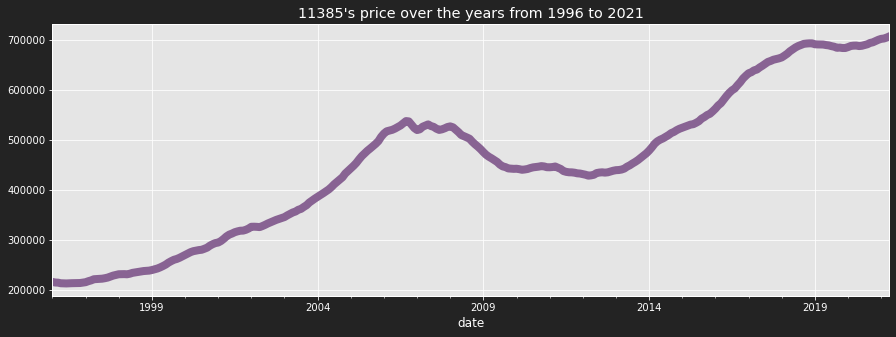

In [23]:
# timeline
ts_df[zipcode].plot(
    figsize=(15, 5),
    legend=0,
    color='#886393',
    lw=8,
    title=
    f"""{zipcode}'s price over the years from {
        str(ts_df[zipcode].index[0]).split(" ")[0].split("-")[0]} to {
        str(ts_df[zipcode].index[-1]).split(" ")[0].split("-")[0]}"""
);

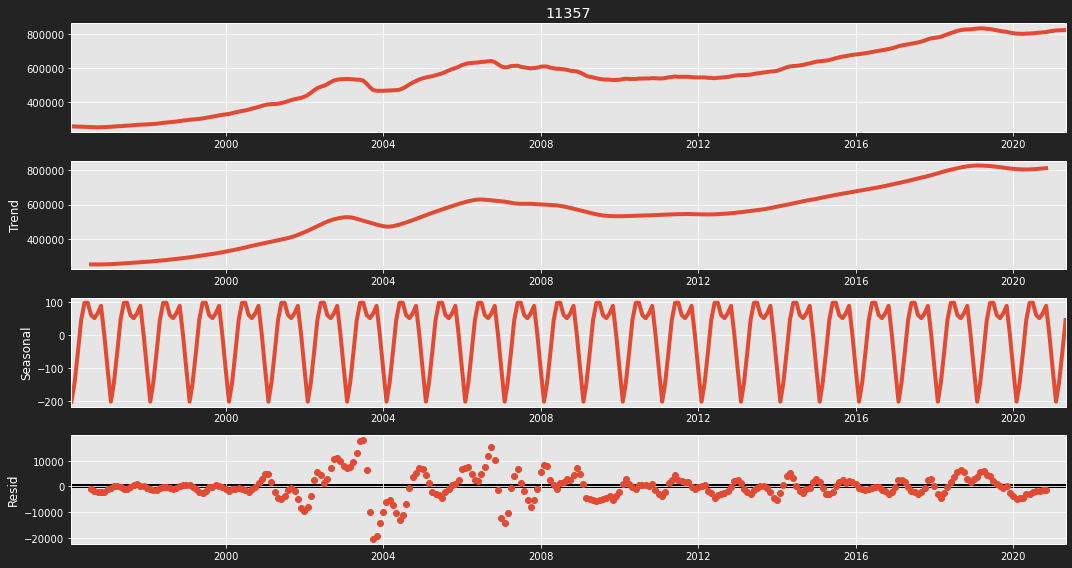

In [84]:
with mpl.rc_context():
    mpl.rc('figure', figsize=(15,8))
    mpl.rc('lines', linewidth = 4)
    tsa.seasonal_decompose(ts_df[zipcode].dropna()).plot();

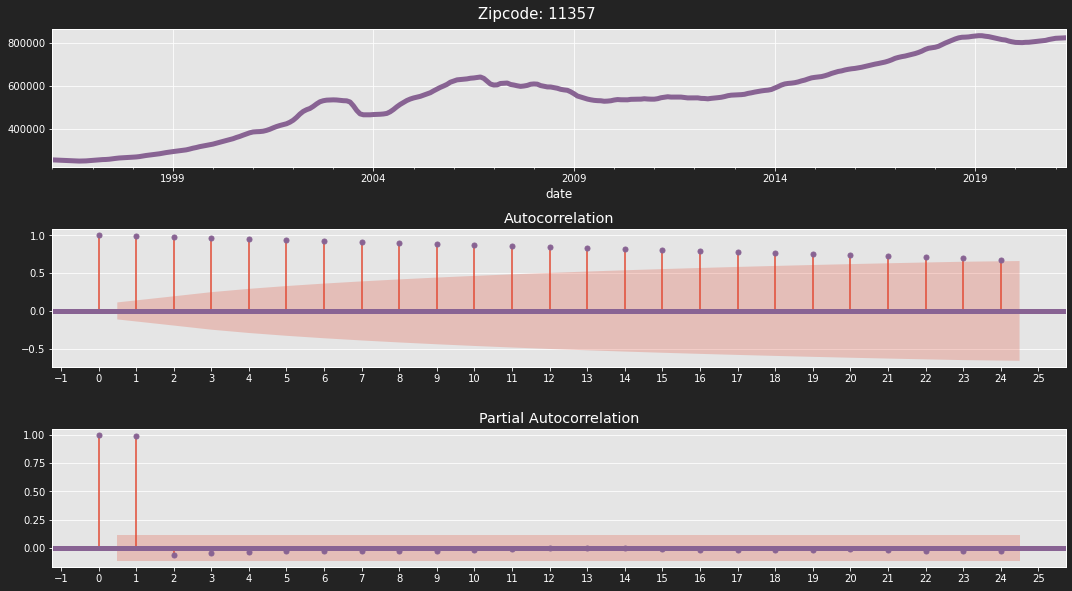

In [85]:
fn.plot_acf_pacf(ts_df[zipcode].dropna());

comment

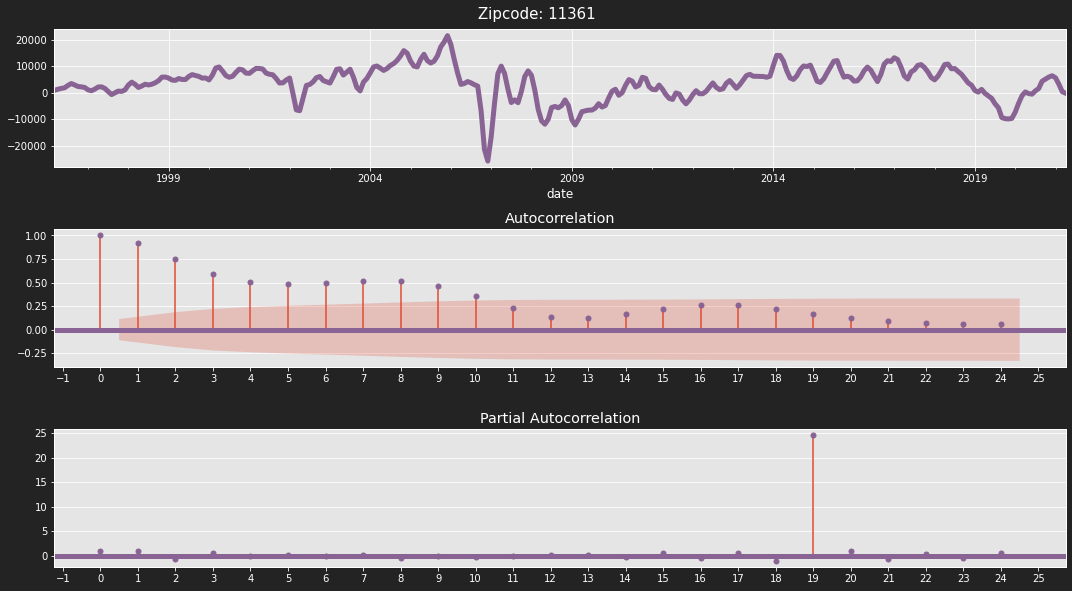

In [46]:
fn.plot_acf_pacf(ts_df[zipcode].diff(2).dropna());

comment

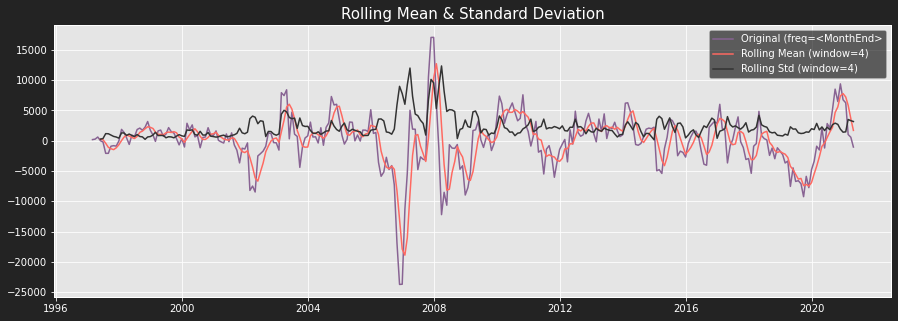

,Test Statistic,#Lags Used,# of Observations Used,p-value,p<.05,Stationary?
ADF Result,-3.905697,15,275,0.001993,True,True


In [52]:
fn.stationarity_check((ts_df[zipcode].diff(1)).diff(12).dropna(), window=4)

### Base MODEL

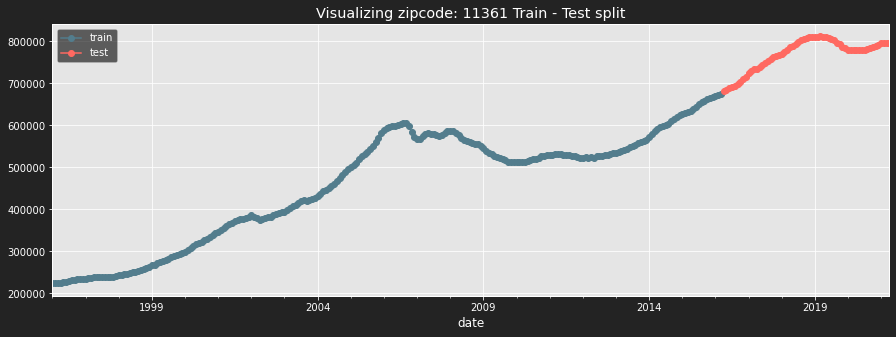

In [40]:
## train test split
train_size = 0.8
split_idx = round(len(ts_df[zipcode].dropna()) * train_size)

## Split
train = ts_df[zipcode].dropna().iloc[:split_idx]
test = ts_df[zipcode].dropna().iloc[split_idx:]
# test = ts_df[zipcode].dropna().iloc[len(ts_df[zipcode])-36:]
# train = ts_df[zipcode].dropna().iloc[:len(ts_df[zipcode])-36]

## Visualize the train-test split split
fig, ax = plt.subplots(figsize=(15, 5))
kws = dict(ax=ax, marker='o')
train.plot(**kws, label='train',color='#537d8d')
test.plot(**kws, label='test',color='#ff6961')
ax.legend()
plt.title(f'Visualizing zipcode: {zipcode} Train - Test split')
plt.show()

In [30]:
# selected params for testing
# time series is not stationary, starting params
p = 0
d = 1
q = 0
# seasonality in data, starting with SARIMAX model
P = 0
D = 1
Q = 0
m = 12

In [31]:
order = (p,d,q)
seasonal_order = (P,D,Q,m)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              11361   No. Observations:                  243
Model:             SARIMAX(0, 2, 0)x(0, 1, 0, 12)   Log Likelihood               -2174.208
Date:                            Thu, 17 Jun 2021   AIC                           4350.415
Time:                                    05:27:45   BIC                           4353.849
Sample:                                01-31-1996   HQIC                          4351.801
                                     - 03-31-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.03e+07   5.72e+05     18.003      0.000    9.18e+06    1.14e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):               129.26
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                             0.32
Prob(H) (two-sided):                  0.18   Kurtosis:                         6.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

                                                                       Model Diagonostics of 11361                                                                      


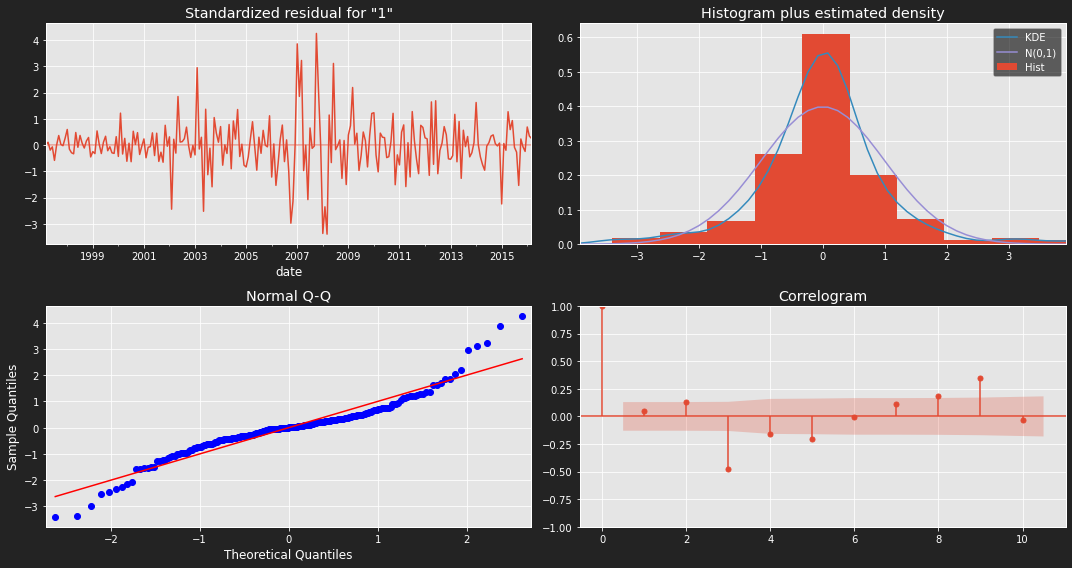

                                                                       Performance on test data of 11361                                                                      


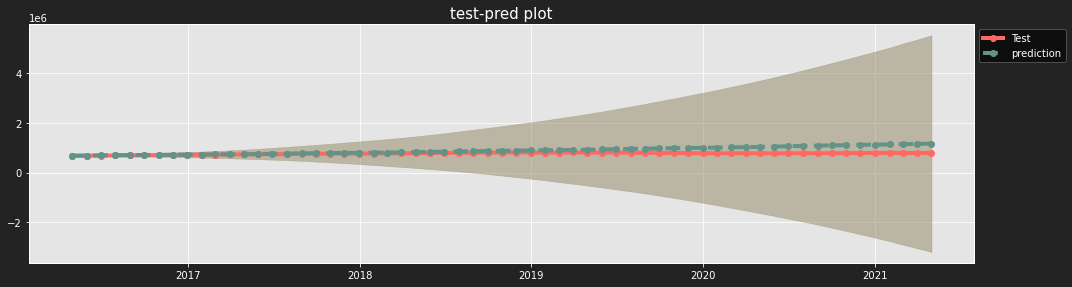

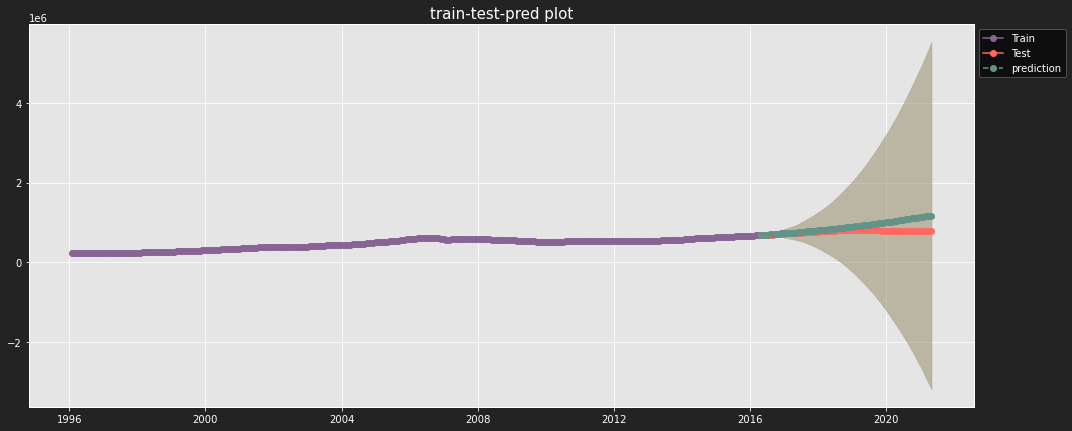

In [58]:
fn.model_builder(train, test, order, seasonal_order, zipcode);

Another One

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              11361   No. Observations:                  243
Model:             SARIMAX(0, 2, 0)x(0, 1, 0, 12)   Log Likelihood               -2174.208
Date:                            Thu, 17 Jun 2021   AIC                           4350.415
Time:                                    05:29:08   BIC                           4353.849
Sample:                                01-31-1996   HQIC                          4351.801
                                     - 03-31-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.03e+07   5.72e+05     18.003      0.000    9.18e+06    1.14e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):               129.26
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                             0.32
Prob(H) (two-sided):                  0.18   Kurtosis:                         6.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

                                                                       Model Diagonostics of 11361                                                                      


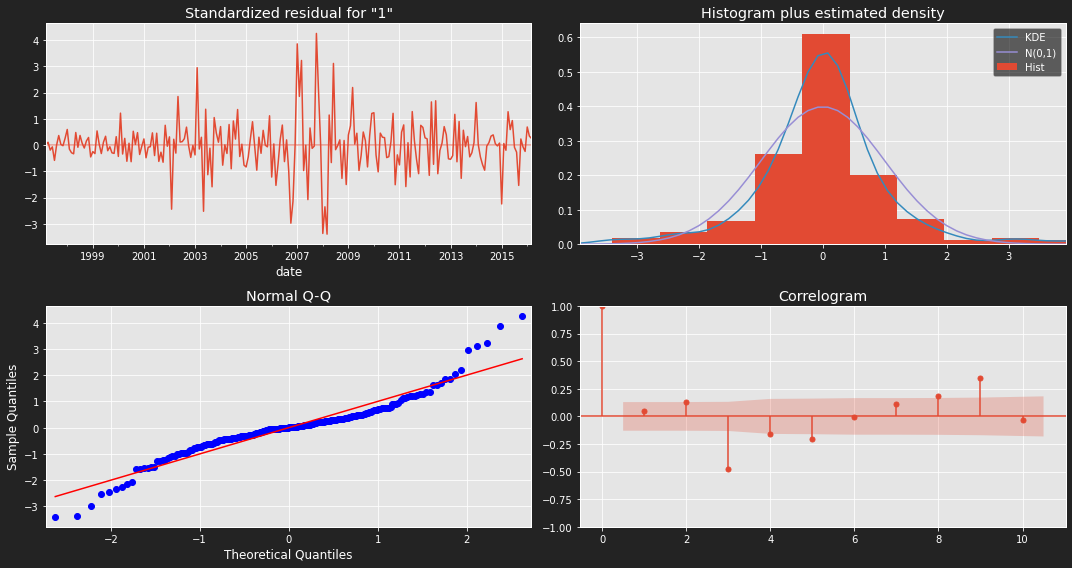

                                                                       Performance on test data of 11361                                                                      


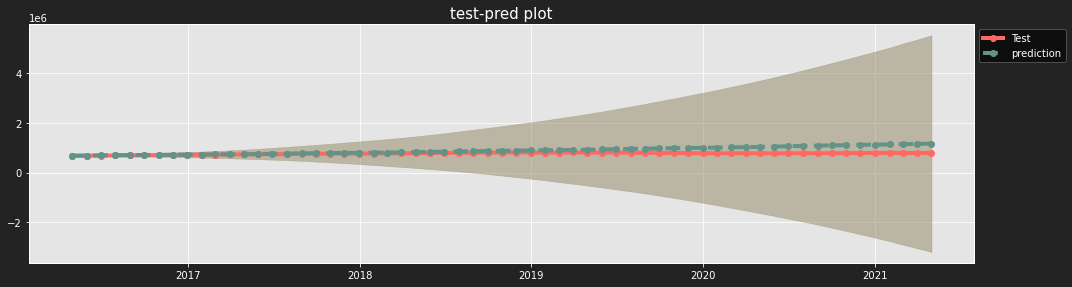

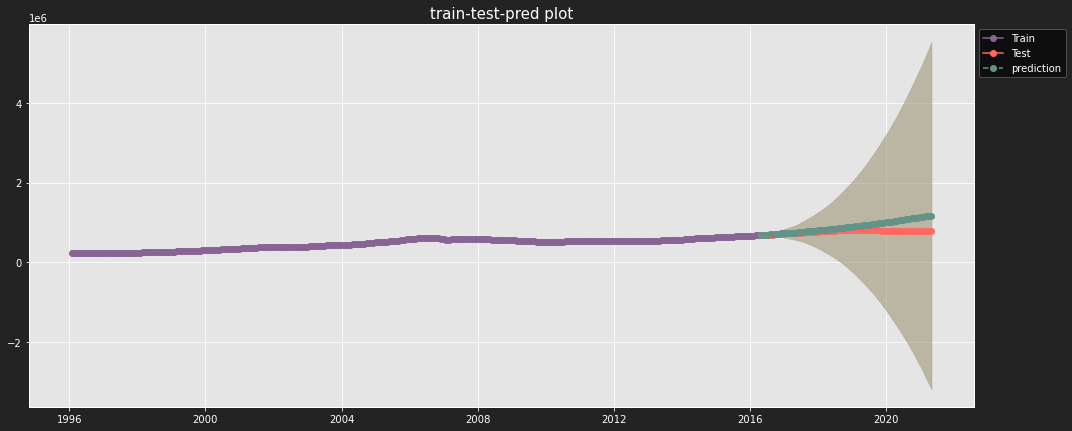

In [60]:
# selected params for testing
# time series is not stationary, starting params
p = 0
d = 2
q = 0
# seasonality in data, starting with SARIMAX model
P = 0
D = 1
Q = 0
m = 12
order = (p,d,q)
seasonal_order = (P,D,Q,m)
fn.model_builder(train, test, order, seasonal_order, zipcode);

In [34]:
from pmdarima.arima.utils import ndiffs
print(ndiffs(ts_df[zipcode],alpha=0.05, test='kpss',max_d=24))
from pmdarima.arima.utils import nsdiffs
print(nsdiffs(ts_df[zipcode],m=12, test='ch',max_D=24))

1
0


### grid searching using  pmdarima

In [136]:
def grid_search(ts, train, test, figsize=(15, 5), trace=True):
    # grid searching using pyramid arima
    d=ndiffs(train, alpha=0.05, test='adf',max_d=4)
    D=nsdiffs(train, m=12, test='ch',max_D=4)
    auto_model = pm.auto_arima(y=train,
                               X=None,
                               start_p=0,
                               d=d,
                               start_q=0,
                               max_p=5,
#                                max_d=12,
                               max_q=5,
                               start_P=0,
                               D=D,
                               start_Q=0,
                               max_P=2,
#                                max_D=12,
                               max_Q=2,
                               max_order=9,
                               m=12,
                               seasonal=True,
                               stationary=False,
                               information_criterion='oob', # 'aic', 'aicc', 'bic', 'hqic', 'oob'
#                                alpha=0.05,
#                                test='adf',
#                                seasonal_test='ch',
                               stepwise=True,
#                                n_jobs=1,
#                                start_params=None,
#                                trend=None, # true-false ## with_intercept
                               method='lbfgs', # ('aic', 'bic', 'hqic','oob')
                               maxiter=100,
#                                offset_test_args=None,
#                                seasonal_test_args=None,
#                                suppress_warnings=True,
                               error_action='trace',
                               trace=2,
#                                random=False,
#                                random_state=None,
#                                n_fits=10,
#                                return_valid_fits=False,
                               out_of_sample_size=6, # 12
                               scoring='mae', # 'mae', 'mse'
                               scoring_args=None,
                               with_intercept="auto")
    # display results of grid search
    display(auto_model.summary())
    auto_model.plot_diagnostics(figsize=figsize)
    plt.tight_layout()
    plt.show()
    # fitting model on train data with the best params found by grid search
    best_model = tsa.SARIMAX(train,
                             order=auto_model.order,
                             seasonal_order=auto_model.seasonal_order,
                             maxiter=500,
                             enforce_invertibility=False).fit()
    forecast = best_model.get_forecast(steps=len(test))
    pred_df_test = pd.DataFrame([
        forecast.conf_int().iloc[:, 0],
        forecast.conf_int().iloc[:, 1], forecast.predicted_mean
    ]).T
    pred_df_test.columns = ["lower", 'upper', 'prediction']
    fn.plot_train_test_pred(train, test, pred_df_test)
    plt.show()

    # fitting on entire data
    best_model_all = tsa.SARIMAX(ts,
                                 order=auto_model.order,
                                 seasonal_order=auto_model.seasonal_order,
                                 maxiter=500,
                                 enforce_invertibility=False).fit()
    forecast = best_model_all.get_forecast(steps=36)
    pred_df = pd.DataFrame([
        forecast.conf_int().iloc[:, 0],
        forecast.conf_int().iloc[:, 1], forecast.predicted_mean
    ]).T
    pred_df.columns = ["lower", 'upper', 'prediction']
    fn.plot_train_test_pred(train, test, pred_df)
    plt.show()
    zipcode = ts.name
    fn.plot_train_test_pred_forecast(train, test, pred_df_test, pred_df, zipcode)

    return auto_model, pred_df

Performing stepwise search to minimize oob
 ARIMA(0,2,0)(0,0,0)[12]             : OOB=432.667, Time=0.02 sec
First viable model found (432.667)
 ARIMA(1,2,0)(1,0,0)[12]             : OOB=444.897, Time=0.13 sec
 ARIMA(0,2,1)(0,0,1)[12]             : OOB=443.743, Time=0.15 sec
 ARIMA(0,2,0)(1,0,0)[12]             : OOB=454.467, Time=0.07 sec
 ARIMA(0,2,0)(0,0,1)[12]             : OOB=446.489, Time=0.18 sec
 ARIMA(0,2,0)(1,0,1)[12]             : OOB=458.758, Time=0.28 sec
 ARIMA(1,2,0)(0,0,0)[12]             : OOB=433.404, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[12]             : OOB=433.377, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[12]             : OOB=433.572, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : OOB=460.616, Time=0.03 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 0.985 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2153.125
Date:                Thu, 17 Jun 2021   AIC                           4308.251
Time:                        08:04:43   BIC                           4311.736
Sample:                             0   HQIC                          4309.655
                                - 243                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.415e+06   1.72e+05     19.902      0.000    3.08e+06    3.75e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):               235.46
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               1.38   Skew:                            -0.44
Prob(H) (two-sided):                  0.15   Kurtosis:                         7.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

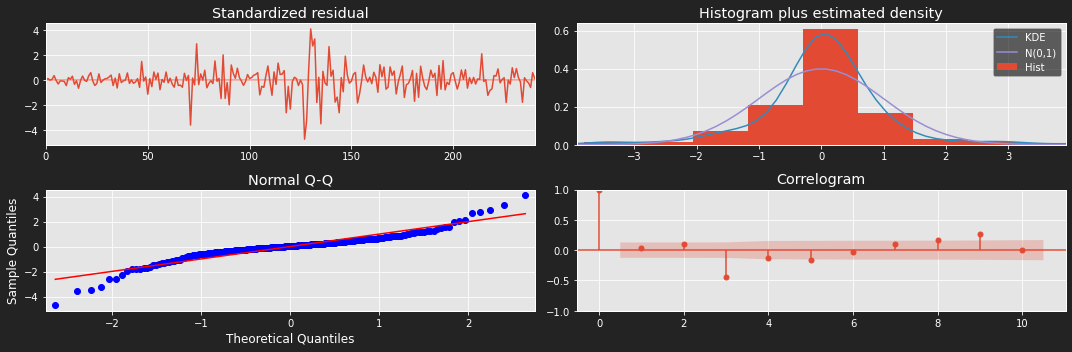

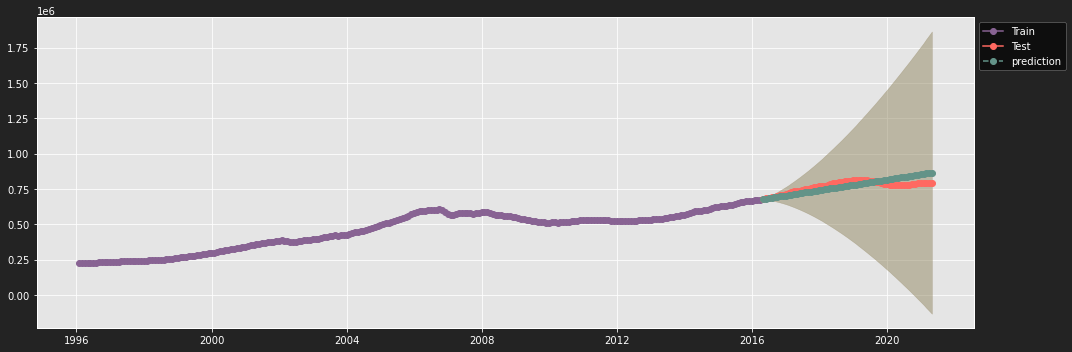

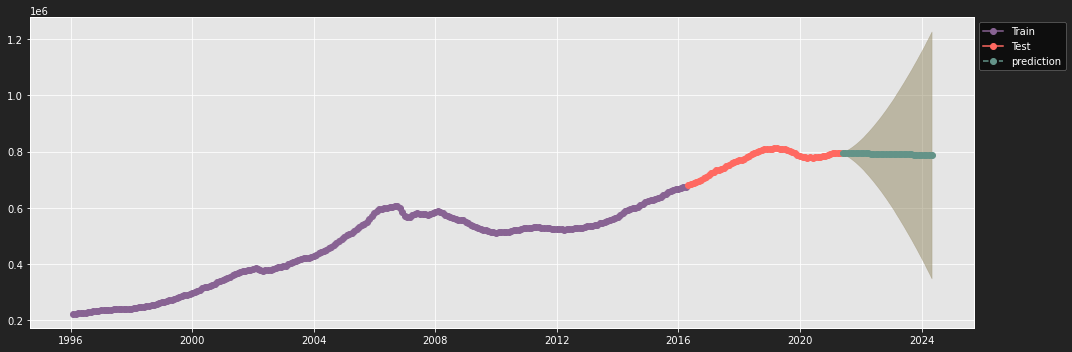

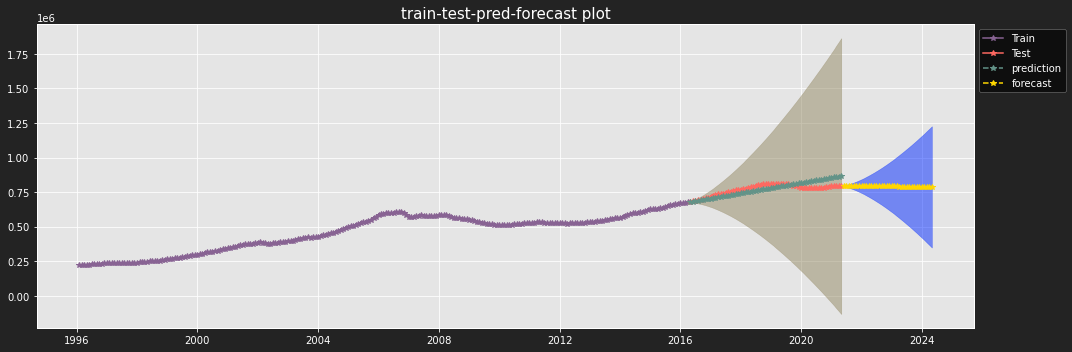

,zipcode,mean_forecasted_roi,lower_forecasted_roi,upper_forecasted_roi,std_forecasted_roi
0,11361,-0.92,-56.09,54.24,55.17


In [132]:
grid_search(ts_df[zipcode], train, test);

Performing stepwise search to minimize oob
 ARIMA(0,2,0)(0,0,0)[12]             : OOB=315927628.417, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[12]             : OOB=303750511.369, Time=0.09 sec
 ARIMA(0,2,1)(0,0,1)[12]             : OOB=303923367.325, Time=0.16 sec
 ARIMA(1,2,0)(0,0,0)[12]             : OOB=315977686.507, Time=0.04 sec
 ARIMA(1,2,0)(2,0,0)[12]             : OOB=303147866.742, Time=0.27 sec
 ARIMA(1,2,0)(3,0,0)[12]             : OOB=299557319.568, Time=0.95 sec
 ARIMA(1,2,0)(3,0,1)[12]             : OOB=297002920.766, Time=0.90 sec
 ARIMA(1,2,0)(2,0,1)[12]             : OOB=302794016.808, Time=0.45 sec
 ARIMA(1,2,0)(3,0,2)[12]             : OOB=276748611.160, Time=4.54 sec
 ARIMA(1,2,0)(2,0,2)[12]             : OOB=inf, Time=1.71 sec
 ARIMA(1,2,0)(3,0,3)[12]             : OOB=275729700.182, Time=4.55 sec
 ARIMA(1,2,0)(2,0,3)[12]             : OOB=inf, Time=4.50 sec
 ARIMA(0,2,0)(3,0,3)[12]             : OOB=269405504.193, Time=4.45 sec
 ARIMA(0,2,0)(2,0,3)[12]             : OO

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                          y   No. Observations:                  243
Model:             SARIMAX(1, 2, 1)x(3, 0, [1, 2, 3], 12)   Log Likelihood               -2150.277
Date:                                    Thu, 17 Jun 2021   AIC                           4320.554
Time:                                            08:33:20   BIC                           4355.402
Sample:                                                 0   HQIC                          4334.594
                                                    - 243                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.8613    532.259      0.024      0.981   -1030.347    1056.069
ar.L1          0.0232     40.545      0.001      1.000     -79.443      79.490
ma.L1         -0.0224     40.549     -0.001      1.000     -79.497      79.453
ar.S.L12       0.6368      0.629      1.013      0.311      -0.595       1.869
ar.S.L24      -0.5961      0.320     -1.860      0.063      -1.224       0.032
ar.S.L36       0.6100      0.470      1.298      0.194      -0.311       1.531
ma.S.L12      -0.6534      0.627     -1.042      0.297      -1.882       0.576
ma.S.L24       0.6170      0.309      1.995      0.046       0.011       1.223
ma.S.L36      -0.6221      0.459     -1.354      0.176      -1.523       0.278
sigma2      2.928e+06      0.108   2.72e+07      0.000    2.93e+06    2.93e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):               243.29
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               1.59   Skew:                            -0.42
Prob(H) (two-sided):                  0.04   Kurtosis:                         7.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.96e+22. Standard errors may be unstable.
"""

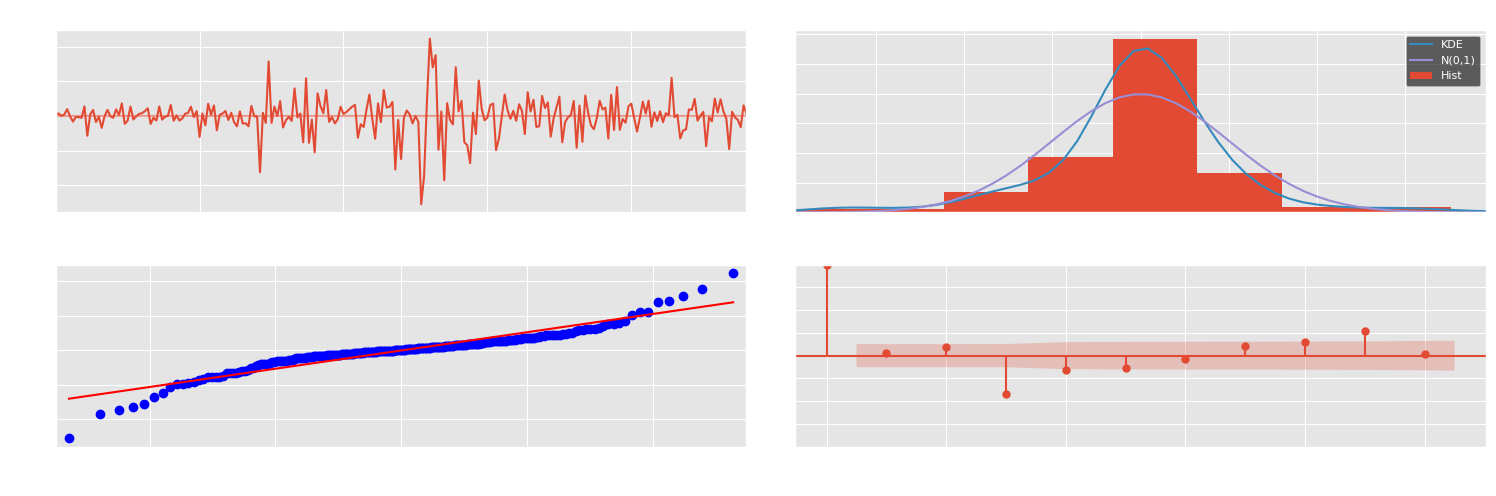

                                                                       Performance on test data of 11361                                                                      


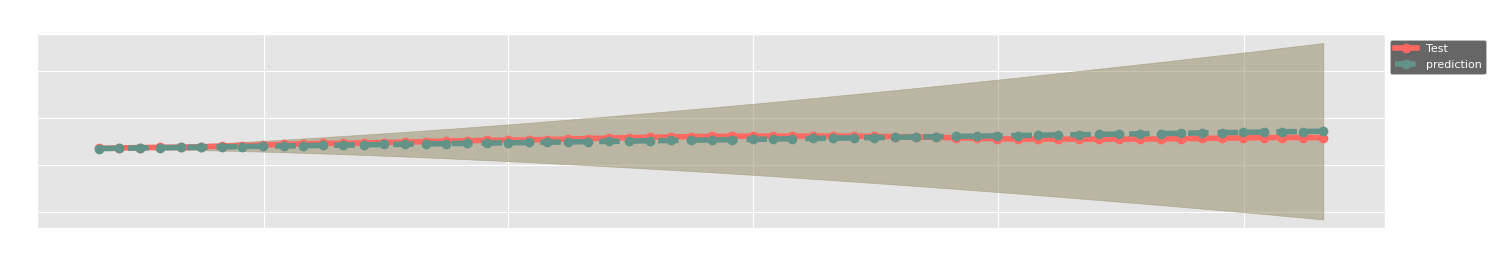

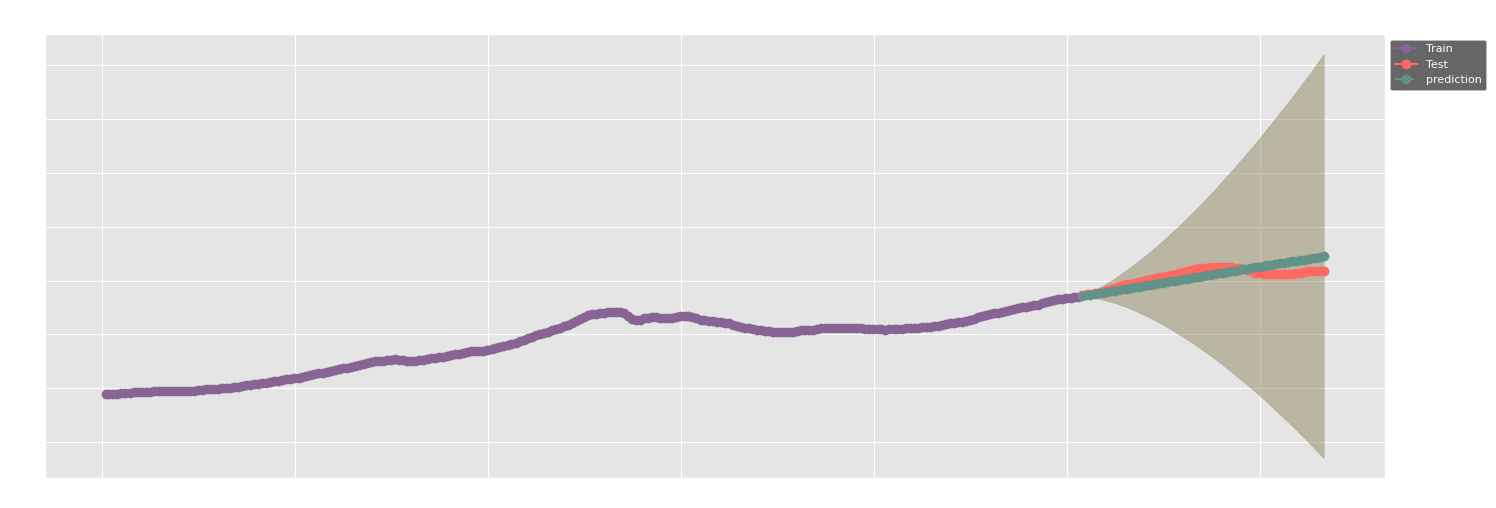

                                                                       Forecast of 11361                                                                      


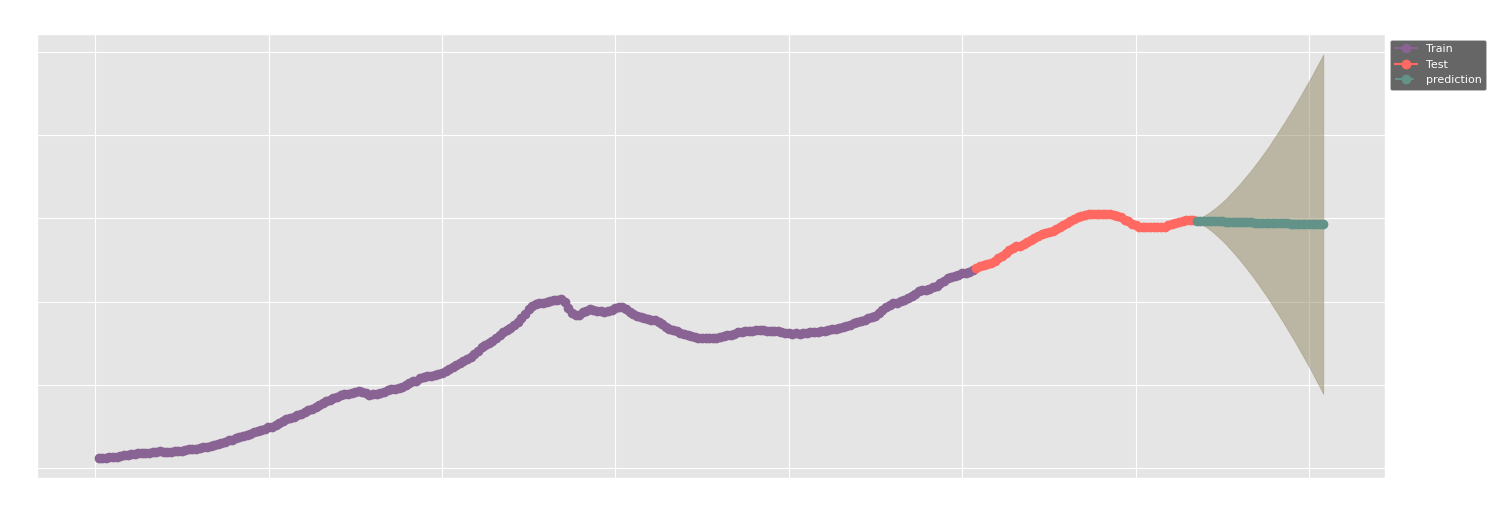

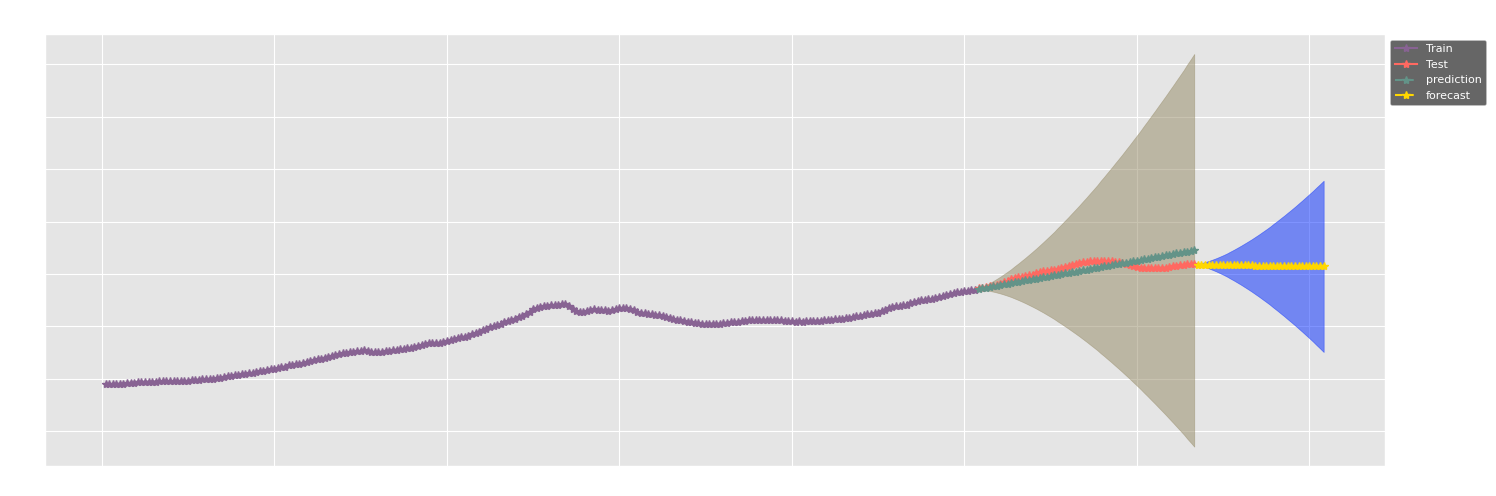

,zipcode,mean_forecasted_roi,lower_forecasted_roi,upper_forecasted_roi,std_forecasted_roi
0,11361,-1.14,-52.52,50.25,51.38


In [147]:
fn.grid_search(ts_df[zipcode], train, test,display_roi_results=True);

## All Zipcodes

In [27]:
results_, roi_ = fn.model_loop(ts_df,
                               zipcode_list,
                               show_grid_search_steps=False,
                               display_details=False)

Working on #1 out of 55 zipcodes.
Working on: 11375
------------------------------------------------------------------------------------------
Working on #2 out of 55 zipcodes.
Working on: 11377
------------------------------------------------------------------------------------------
Working on #3 out of 55 zipcodes.
Working on: 11355
------------------------------------------------------------------------------------------
Working on #4 out of 55 zipcodes.
Working on: 11385
------------------------------------------------------------------------------------------
Working on #5 out of 55 zipcodes.
Working on: 11373
------------------------------------------------------------------------------------------
Working on #6 out of 55 zipcodes.
Working on: 11372
------------------------------------------------------------------------------------------
Working on #7 out of 55 zipcodes.
Working on: 11101
------------------------------------------------------------------------------------------

In [3]:
import joblib

In [4]:
# filename='model'
# joblib.dump({'Results':results_, 'ROI': roi_}, f'./model/{filename}.joblib')

In [5]:
lod = joblib.load('./model/model.joblib')

In [6]:
results_ = lod['Results']
roi_ = lod['ROI']

In [7]:
roi_

,zipcode,mean_forecasted_roi,lower_forecasted_roi,upper_forecasted_roi,std_forecasted_roi
0,11375,-0.407783,-1.166997,0.351431,0.759214
1,11377,0.071494,-0.316614,0.459602,0.388108
2,11355,-0.028766,-0.859465,0.801933,0.830699
3,11385,0.121669,-0.355607,0.598945,0.477276
4,11373,0.143560,-0.306912,0.594031,0.450472
5,11372,0.091835,-0.809249,0.992918,0.901084
6,11101,-0.234924,-0.964429,0.494582,0.729505
7,11368,-0.081873,-0.727770,0.564025,0.645897
8,11354,-0.171130,-0.569132,0.226872,0.398002
9,11374,0.026144,-0.485759,0.538047,0.511903


## Best Zipcodes

In [8]:
((roi_.set_index('zipcode')[[
    'mean_forecasted_roi', 'std_forecasted_roi'
]].sort_values(by='mean_forecasted_roi')[-15:].sort_values(
    by='std_forecasted_roi')[:5]) * 100)

,mean_forecasted_roi,std_forecasted_roi
zipcode,,
11429,22.230379,45.001385
11428,34.241021,47.287097
11427,30.558596,47.554807
11423,39.547861,48.105119
11417,18.564516,48.358635


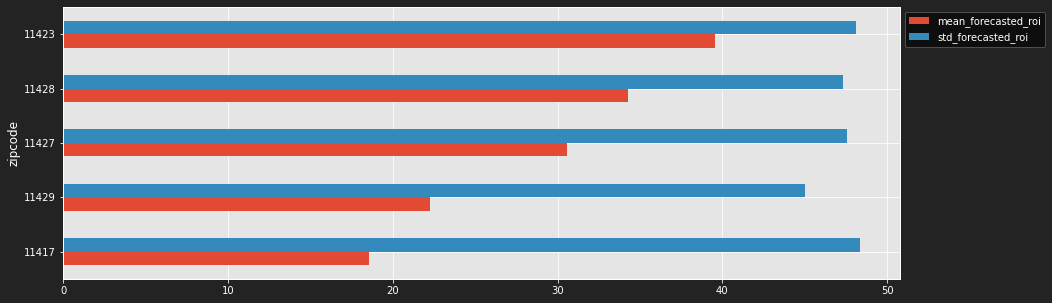

In [9]:
((roi_.set_index('zipcode')[[
    'mean_forecasted_roi', 'std_forecasted_roi'
]].sort_values(by='mean_forecasted_roi',ascending=True)[-15:].sort_values(
    by='std_forecasted_roi',ascending=False)[-5:]) * 100).sort_values(by='mean_forecasted_roi',ascending=True).plot(kind='barh',figsize=(15,5))
plt.legend(bbox_to_anchor=(1,1), loc="upper left");

In [10]:
best_investments = ((roi_.set_index('zipcode')[[
    'mean_forecasted_roi', 'std_forecasted_roi'
]].sort_values(by='mean_forecasted_roi')[-15:].sort_values(
    by='std_forecasted_roi')[:5]) * 100).index

best_investments

Index(['11429', '11428', '11427', '11423', '11417'], dtype='object', name='zipcode')

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Report of 11429                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------
 Model Used:


ARIMA(order=(3, 2, 1), out_of_sample_size=12, scoring_args={},
      seasonal_order=(2, 0, 0, 12), suppress_warnings=True)

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  243
Model:             SARIMAX(3, 2, 1)x(2, 0, [], 12)   Log Likelihood               -2086.374
Date:                             Thu, 17 Jun 2021   AIC                           4188.747
Time:                                     19:36:01   BIC                           4216.626
Sample:                                          0   HQIC                          4199.979
                                             - 243                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.1934     33.831      0.449      0.653     -51.114      81.501
ar.L1          0.5644      

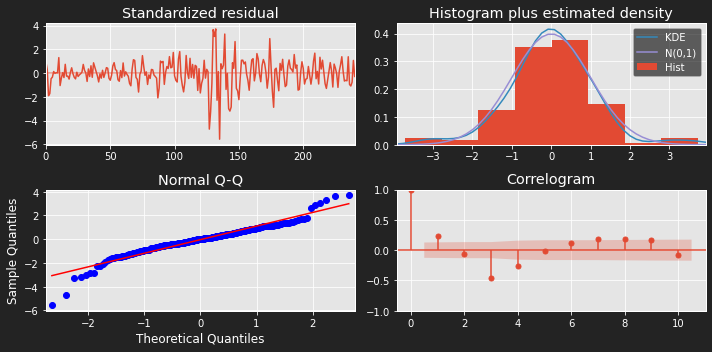

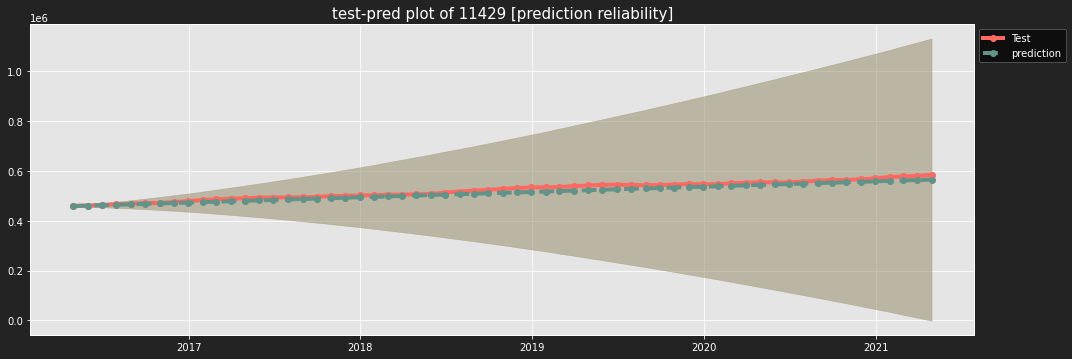

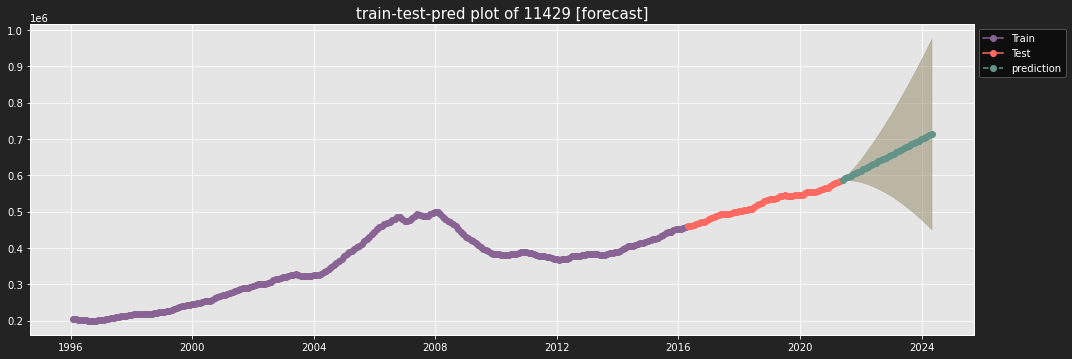

 Insights:


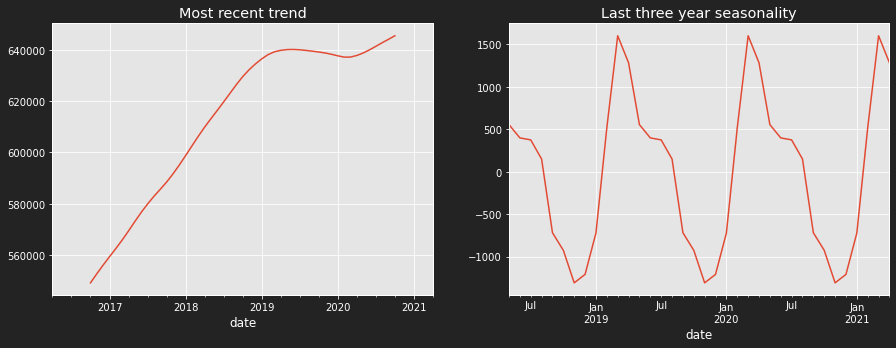

 Overall model performance and projected ROI:


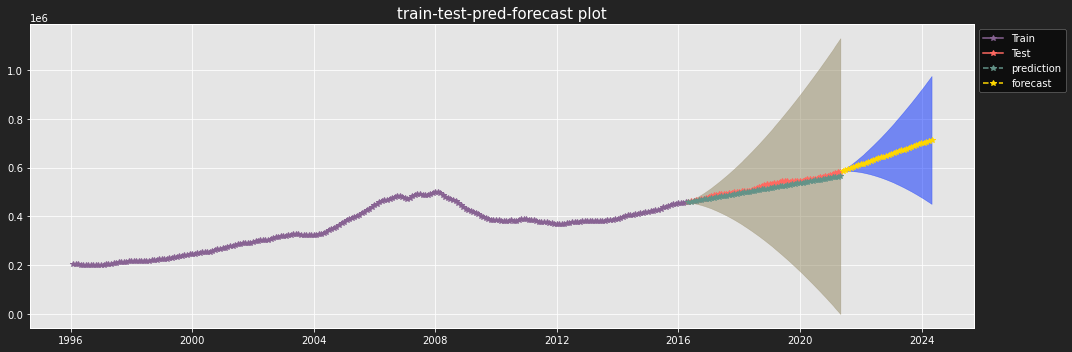

,zipcode,mean_forecasted_roi,lower_forecasted_roi,upper_forecasted_roi,std_forecasted_roi
0,11429,22.23,-22.77,67.23,45.0


-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Report of 11428                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------
 Model Used:


ARIMA(order=(1, 2, 3), out_of_sample_size=12, scoring_args={},
      seasonal_order=(2, 0, 0, 12), suppress_warnings=True)

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  243
Model:             SARIMAX(1, 2, 3)x(2, 0, [], 12)   Log Likelihood               -2108.363
Date:                             Thu, 17 Jun 2021   AIC                           4232.725
Time:                                     19:36:02   BIC                           4260.603
Sample:                                          0   HQIC                          4243.957
                                             - 243                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     17.4917     40.570      0.431      0.666     -62.024      97.007
ar.L1          0.5195      

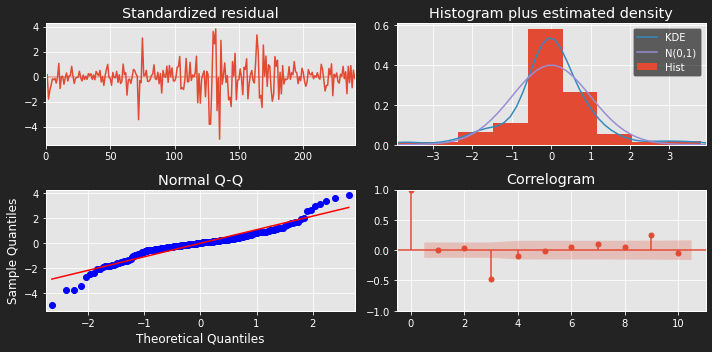

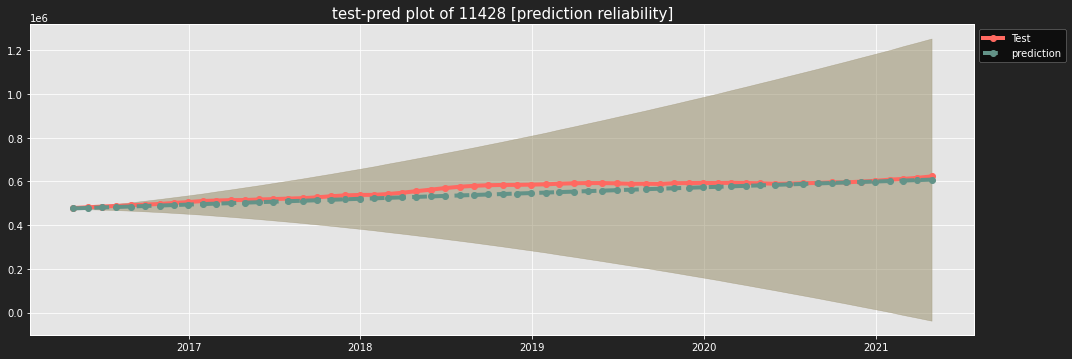

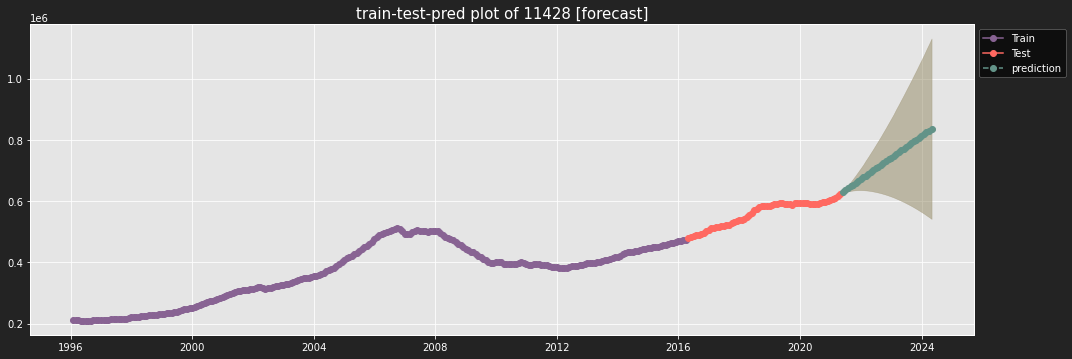

 Insights:


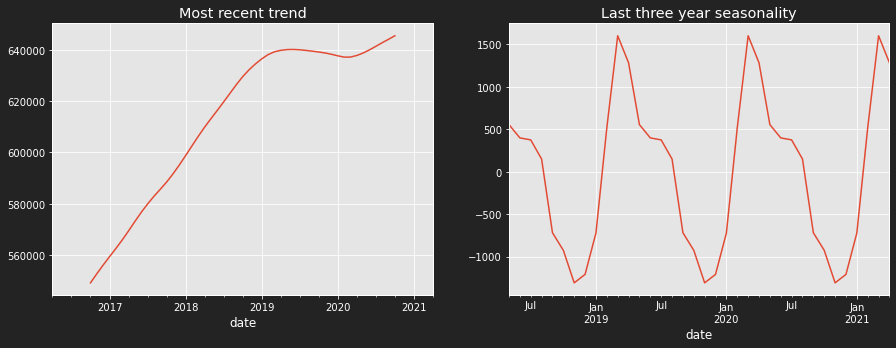

 Overall model performance and projected ROI:


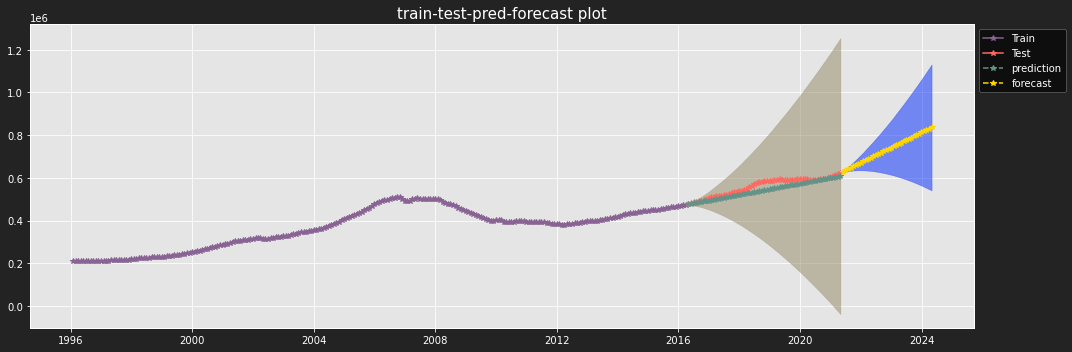

,zipcode,mean_forecasted_roi,lower_forecasted_roi,upper_forecasted_roi,std_forecasted_roi
0,11428,34.24,-13.05,81.53,47.29


-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Report of 11427                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------
 Model Used:


ARIMA(order=(1, 2, 3), out_of_sample_size=12, scoring_args={},
      seasonal_order=(1, 0, 3, 12), suppress_warnings=True)

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  243
Model:             SARIMAX(1, 2, 3)x(1, 0, 3, 12)   Log Likelihood               -2086.555
Date:                            Thu, 17 Jun 2021   AIC                           4193.110
Time:                                    19:36:04   BIC                           4227.958
Sample:                                         0   HQIC                          4207.149
                                            - 243                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.7728     64.474      0.183      0.855    -114.594     138.139
ar.L1          0.3847      0.545   

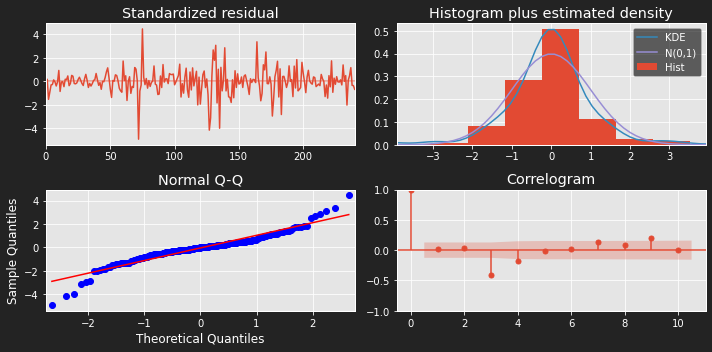

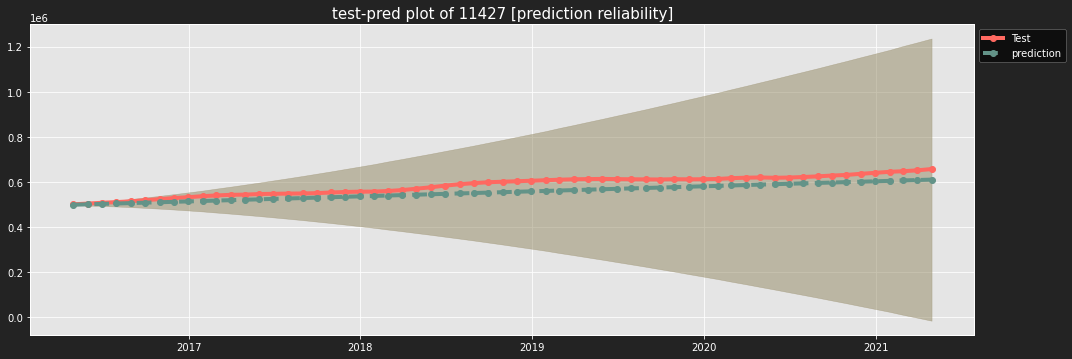

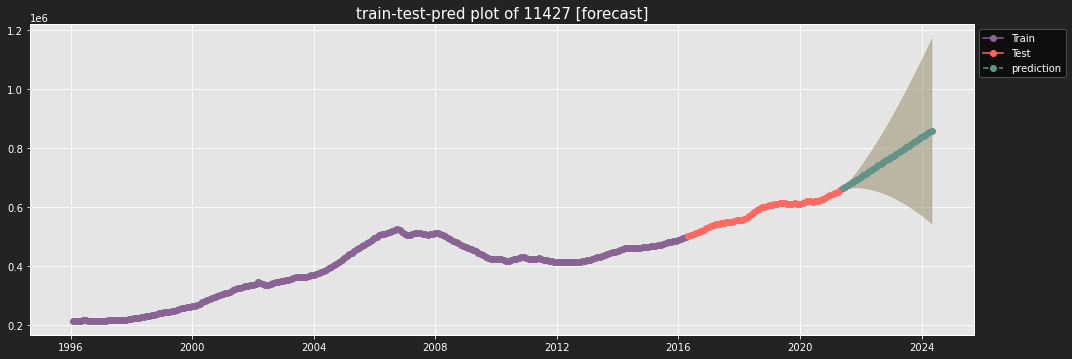

 Insights:


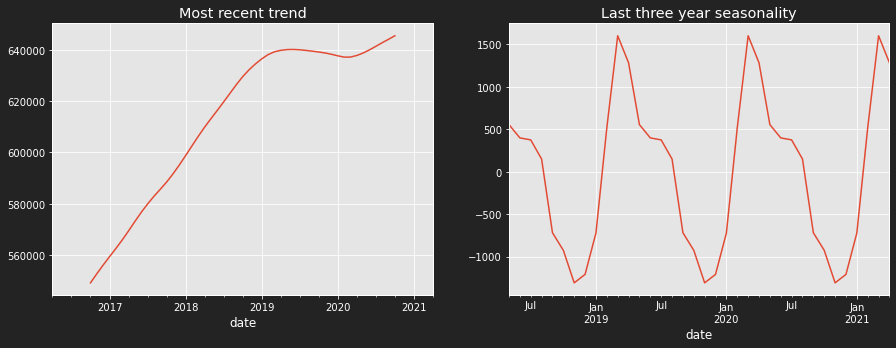

 Overall model performance and projected ROI:


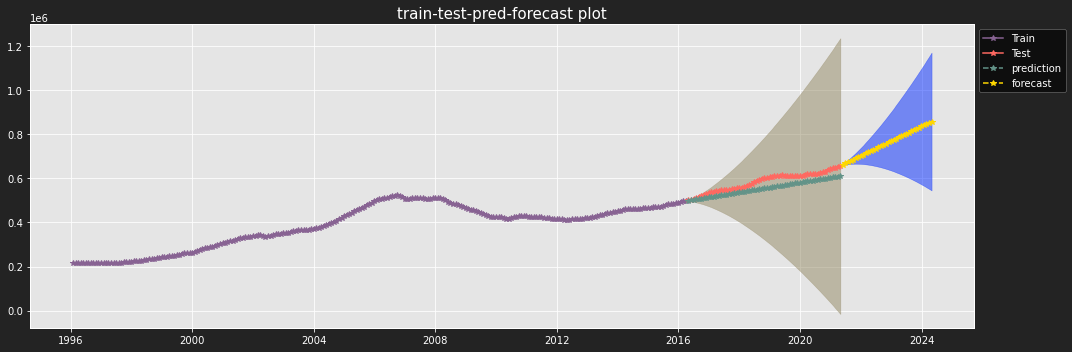

,zipcode,mean_forecasted_roi,lower_forecasted_roi,upper_forecasted_roi,std_forecasted_roi
0,11427,30.56,-17.0,78.11,47.55


-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Report of 11423                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------
 Model Used:


ARIMA(order=(3, 2, 1), out_of_sample_size=12, scoring_args={},
      seasonal_order=(0, 0, 1, 12), suppress_warnings=True)

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  243
Model:             SARIMAX(3, 2, 1)x(0, 0, 1, 12)   Log Likelihood               -2116.675
Date:                            Thu, 17 Jun 2021   AIC                           4247.351
Time:                                    19:36:06   BIC                           4271.744
Sample:                                         0   HQIC                          4257.178
                                            - 243                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.5646     37.425      0.309      0.757     -61.787      84.916
ar.L1          0.5965      0.314   

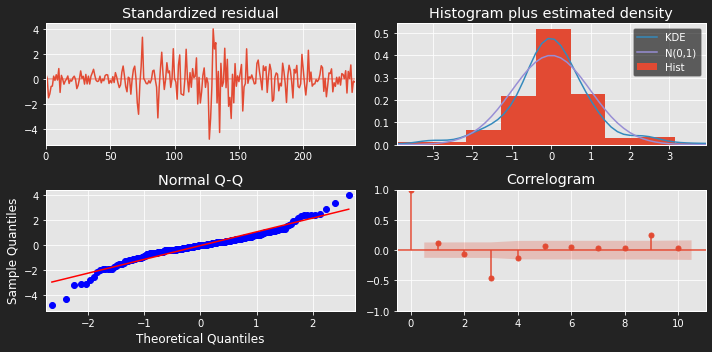

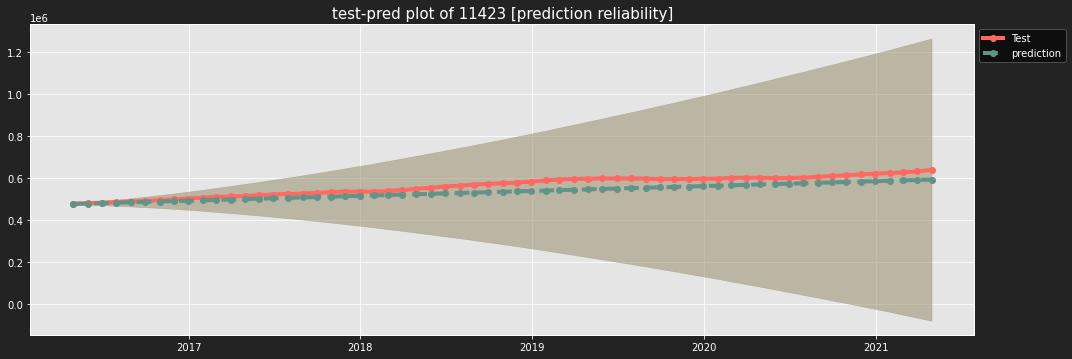

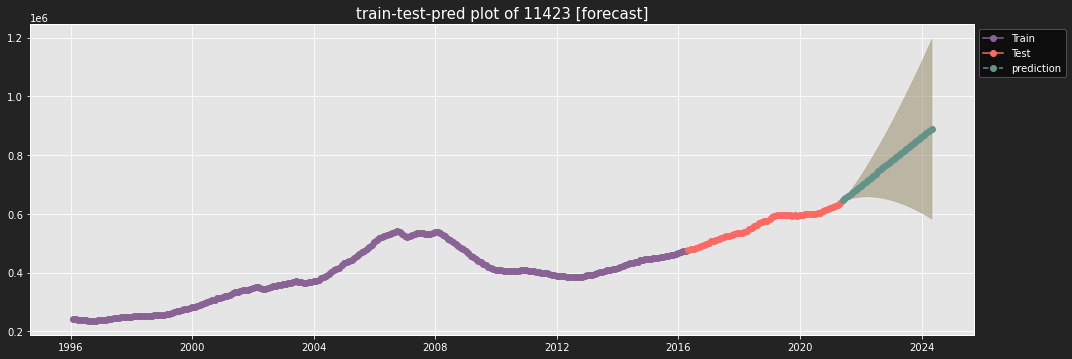

 Insights:


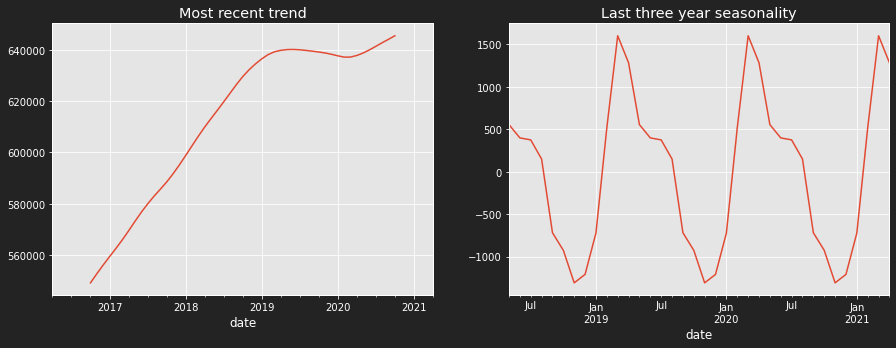

 Overall model performance and projected ROI:


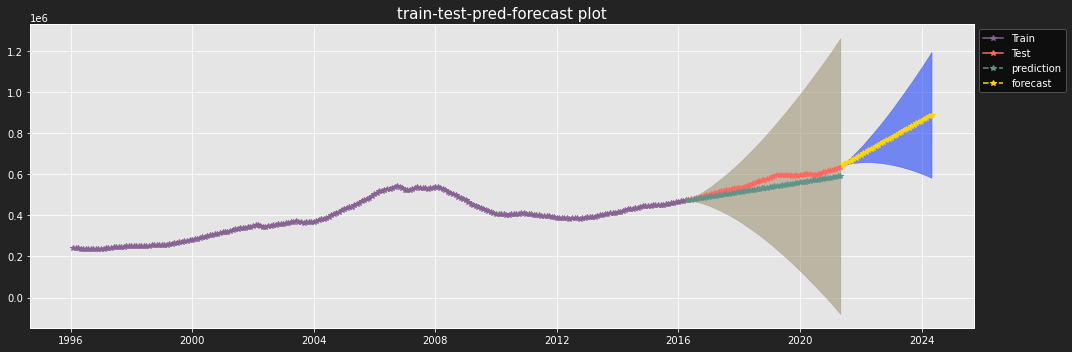

,zipcode,mean_forecasted_roi,lower_forecasted_roi,upper_forecasted_roi,std_forecasted_roi
0,11423,39.55,-8.56,87.65,48.11


-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Report of 11417                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------
 Model Used:


ARIMA(order=(1, 2, 2), out_of_sample_size=12, scoring_args={},
      seasonal_order=(2, 0, 0, 12), suppress_warnings=True)

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  243
Model:             SARIMAX(1, 2, 2)x(2, 0, [], 12)   Log Likelihood               -2108.641
Date:                             Thu, 17 Jun 2021   AIC                           4231.282
Time:                                     19:36:07   BIC                           4255.676
Sample:                                          0   HQIC                          4241.110
                                             - 243                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.6332     41.435      0.329      0.742     -67.579      94.845
ar.L1          0.7548      

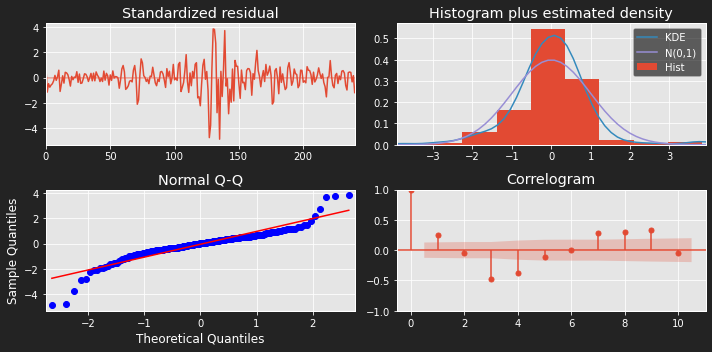

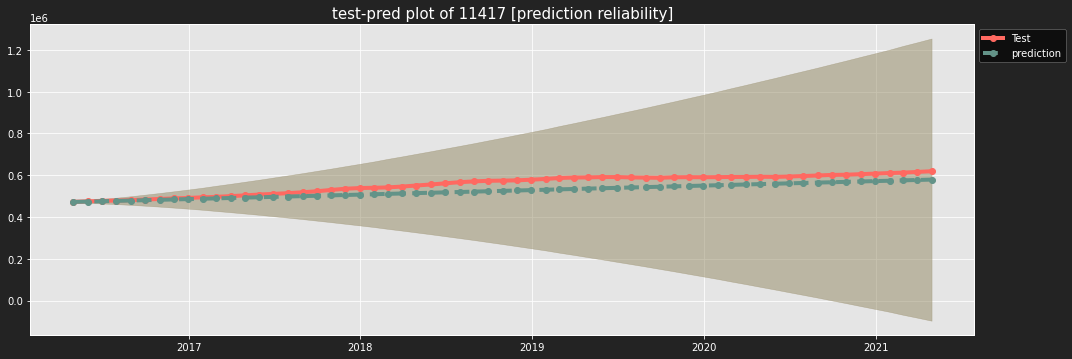

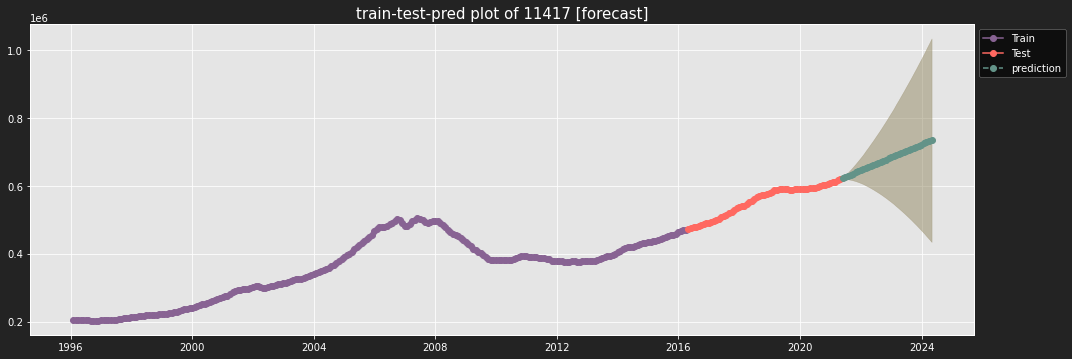

 Insights:


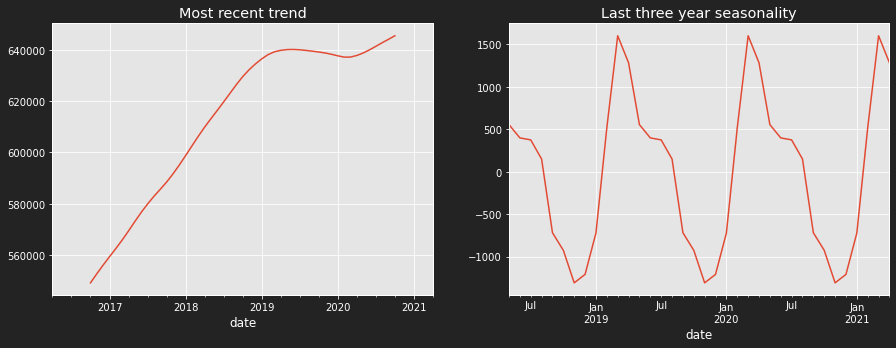

 Overall model performance and projected ROI:


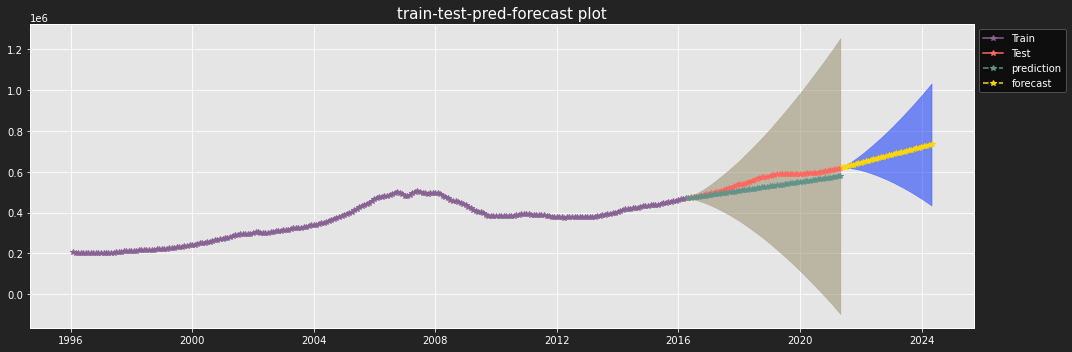

,zipcode,mean_forecasted_roi,lower_forecasted_roi,upper_forecasted_roi,std_forecasted_roi
0,11417,18.56,-29.79,66.92,48.36


In [73]:
#############################  OUTPUT CONTROL  ##############################
#############################################################################
show_model_performance = True  # Performance metrics & Diagonistics plots
show_train_fit = True          # test and prediction fit
show_prediction = True         # forecast in the future
#---------------------------------------------------------------------------#
show_detailed_prediction = True  # forecast in the future, whith prediction #
#terminology: ###  prediction is to judge model performance   ###############
###################################   &   ###################################
################   forecast is prediction of unknown  #######################
#############################################################################
for best_zipcode in best_investments:
    # display models
    print(f'{"-"*157}')
    print('\033[1m \033[5;30;47m' +
          f'{" "*70}Report of {best_zipcode}{" "*70}' + '\033[0m')
    print(f'{"-"*157}')
    print('\033[1m \033[91m' + 'Model Used:')
    display(results_[best_zipcode]['model'])
    if show_model_performance:
        # model performance
        print(results_[best_zipcode]['model'].summary())
        results_[best_zipcode]['model'].plot_diagnostics(figsize=(10, 5))
        plt.tight_layout()
    # extracting information from results dict
    train = results_[best_zipcode]['train']
    test = results_[best_zipcode]['test']
    pred_df_test = results_[best_zipcode]['pred_df_test']
    pred_df = results_[best_zipcode]['pred_df']
    if show_train_fit:
        # plot train fit
        _, ax = fn.plot_test_pred(test, pred_df_test)
        ax.set_title(f'test-pred plot of {best_zipcode} [prediction reliability]',
                     size=15)
        plt.show()
    if show_prediction:
        # plot_train_test_pred
        _, ax = fn.plot_train_test_pred(train, test, pred_df)
        ax.set_title(f'train-test-pred plot of {best_zipcode} [forecast]',
                     size=15)
        plt.show()
    if show_detailed_prediction:
        print('\033[1m \033[1;33;40m' + 'Insights:')
        # train_test_pred_forecast
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
        ax1 = tsa.seasonal_decompose(results_['11432']['test']).trend.plot(
            title='Most recent trend', ax=ax1)
        ax2 = tsa.seasonal_decompose(
            results_['11432']['test'][-36:]).seasonal.plot(
                title='Last three year seasonality', ax=ax2)
        plt.show()
        print('\033[1m \033[1;33;40m' + 'Overall model performance and projected ROI:')
        _, ax, _ = fn.plot_train_test_pred_forecast(train, test, pred_df_test,
                                                    pred_df, best_zipcode)
        ax.set_title(f'train-test-pred-forecast plot of {best_zipcode}',
                     size=15)
    plt.show()

In [25]:
import plotly.express as px

In [ ]:
px.choropleth_mapbox(

In [12]:
## Viz

In [13]:
code_match = pd.read_csv('./data/nyc-zip-codes.txt')
code_match['ZipCode'] = code_match['ZipCode'].astype('str')
roi_viz = pd.merge(roi_, code_match, left_on='zipcode', right_on='ZipCode')
roi_viz.drop(columns=['Borough', 'ZipCode'], inplace=True)
# display(roi_viz)
roi_viz[roi_viz.columns.values[1:-1]] = roi_viz[
    roi_viz.columns.values[1:-1]].apply(lambda x: round(x * 100, 2), axis=1)
# roi_viz

In [33]:
fn.map_zipcodes_return(roi_viz, plot_style='static')
# # Folium version
# fn.zip_code_map(roi_)

# Todo:
- statistical measure of model fit goodness
    - rmse, mae of test and predict
    - oob information or aic, bic
- eda on time series
- show seasonality plot for best models as eda
- public facing eda
- individual eda
- explore bad rois 
<!-- - train model -->
<!-- - save model -->
<!-- - show data of top 5 models. -->
<!-- - turn on/off process in looping. -->
<!-- - save test pred -->
<!-- - save model locally -->
<!-- - ggplot facecolor -->

## Prophet

In [24]:
try:
    from fbprophet import Prophet
#     from ksadsad import sadsa
except:
    !pip install fbprophet
    # for troubleshooting: https://facebook.github.io/prophet/docs/installation.html#python
from statsmodels.tools.eval_measures import rmse

In [45]:
zipcode='11428'

In [46]:
ts_df[zipcode]

date
1996-01-31    210887.0
1996-02-29    210338.0
1996-03-31    210058.0
1996-04-30    209436.0
1996-05-31    209332.0
                ...   
2020-12-31    602909.0
2021-01-31    608164.0
2021-02-28    611535.0
2021-03-31    616593.0
2021-04-30    623049.0
Freq: M, Name: 11428, Length: 304, dtype: float64

In [47]:
ts_proph = ts_df[zipcode]

In [48]:
ts_proph = ts_proph.reset_index()

In [49]:
ts_proph.columns = ['ds','y']

In [50]:
ts_proph

,ds,y
0,1996-01-31,210887.0
1,1996-02-29,210338.0
2,1996-03-31,210058.0
3,1996-04-30,209436.0
4,1996-05-31,209332.0
...,...,...
299,2020-12-31,602909.0
300,2021-01-31,608164.0
301,2021-02-28,611535.0
302,2021-03-31,616593.0


In [51]:
ts_proph.dtypes

ds    datetime64[ns]
y            float64
dtype: object

<AxesSubplot:xlabel='ds'>

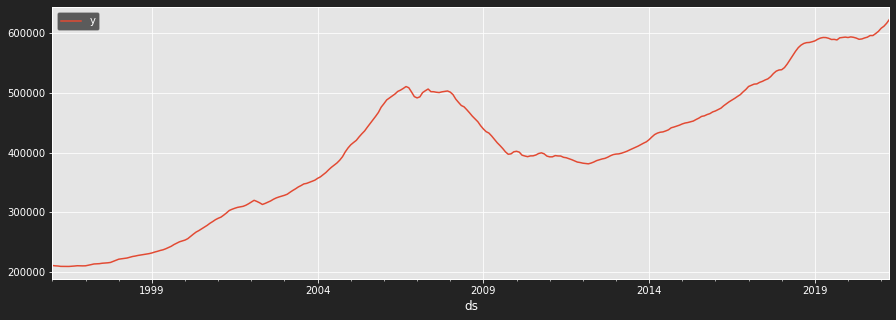

In [52]:
ts_proph.plot(x='ds', y='y', figsize=(15, 5))

In [53]:
len(ts_proph)

304

In [54]:
train = ts_proph.iloc[:len(ts_proph) - 36]
test = ts_proph.iloc[len(ts_proph) - 36:]

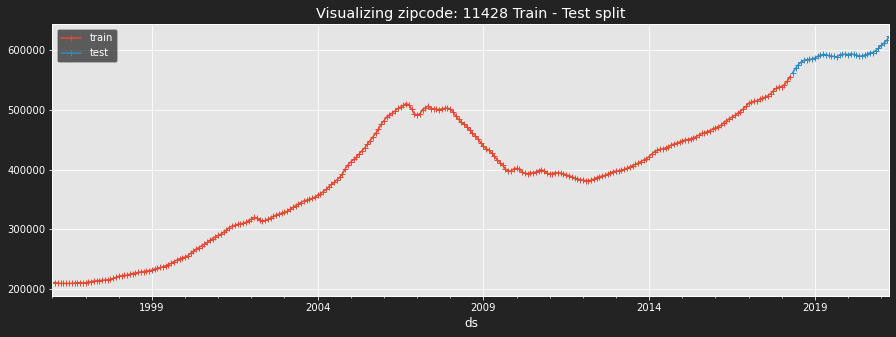

In [55]:
## Visualize the train-test split split
fig, ax = plt.subplots(figsize=(15, 5))
kws = dict(x='ds',y='y', ax=ax, marker='+')
train.plot(**kws, label='train')
test.plot(**kws, label='test')
ax.legend()
plt.title(f'Visualizing zipcode: {zipcode} Train - Test split')
plt.show()

In [56]:
m = Prophet(interval_width=0.95,
            weekly_seasonality=False,
            daily_seasonality=False,seasonality_mode='additive')
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(train)
future = m.make_future_dataframe(periods=36, freq='MS')
forecast = m.predict(future)

In [57]:
# forecast.tail()

<AxesSubplot:xlabel='ds'>

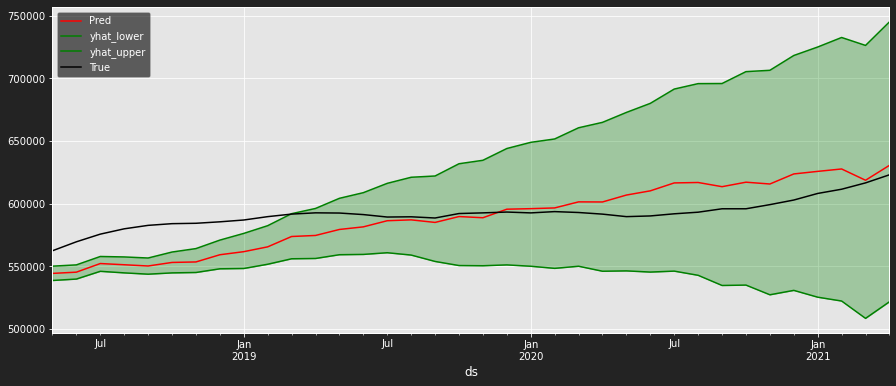

In [58]:
ax = forecast[len(ts_proph) - 36:].plot(x='ds',
                                        y='yhat',
                                        label='Pred',
                                        legend=True,
                                        figsize=(15, 6),
                                        color='red')
forecast.iloc[len(ts_proph) - 36:].plot(x='ds',
                                        y='yhat_lower',
                                        ax=ax,
                                        color='g')
forecast.iloc[len(ts_proph) - 36:].plot(x='ds',
                                        y='yhat_upper',
                                        ax=ax,
                                        color='g')
ax.fill_between(x=forecast.iloc[len(ts_proph) - 36:]['ds'].values,
                y1=forecast.iloc[len(ts_proph) - 36:]['yhat_lower'],
                y2=forecast.iloc[len(ts_proph) - 36:]['yhat_upper'],
                color='g',
                alpha=.3)
test.plot(x='ds', y='y', label='True', legend=True, ax=ax, color='k')

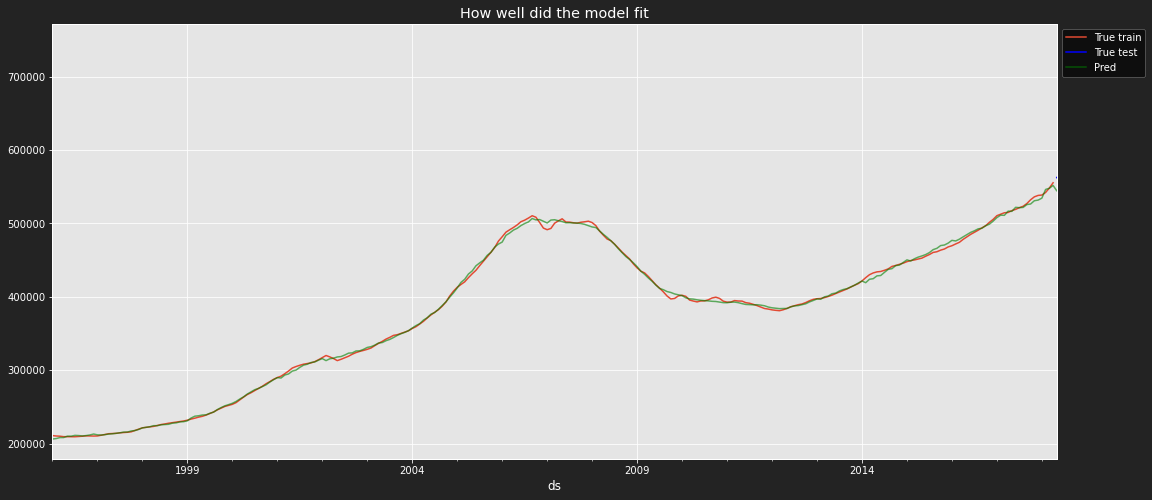

In [59]:
ax = train.plot(x='ds',
                y='y',
                label='True train',
                legend=True,
                figsize=(18, 8))
test.plot(x='ds', y='y', label='True test', legend=True, ax=ax, color='b')
forecast.plot(x='ds',
              y='yhat',
              label='Pred',
              legend=True,
              color='g',
              ax=ax,
              alpha=.6)
ax.fill_between(x=forecast.iloc[len(ts_proph) - 36:]['ds'].values,
                y1=forecast.iloc[len(ts_proph) - 36:]['yhat_lower'],
                y2=forecast.iloc[len(ts_proph) - 36:]['yhat_upper'],
                color='g',
                alpha=.3)

ax.set_xlim((forecast.iloc[0]['ds'], forecast.iloc[len(ts_proph) - 36]['ds']))
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.title('How well did the model fit')
plt.show()

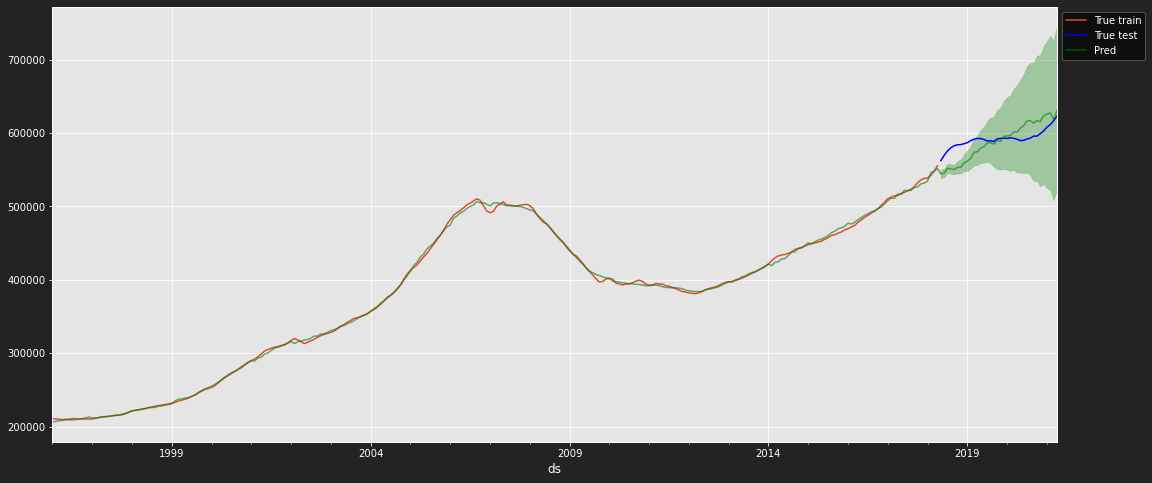

In [60]:
ax = train.plot(x='ds',
                y='y',
                label='True train',
                legend=True,
                figsize=(18, 8))
test.plot(x='ds', y='y', label='True test', legend=True, ax=ax, color='b')
forecast.plot(x='ds',
              y='yhat',
              label='Pred',
              legend=True,
              color='g',
              ax=ax,
              alpha=.6)
ax.fill_between(x=forecast.iloc[len(ts_proph) - 36:]['ds'].values,
                y1=forecast.iloc[len(ts_proph) - 36:]['yhat_lower'],
                y2=forecast.iloc[len(ts_proph) - 36:]['yhat_upper'],
                color='g',
                alpha=.3)

# ax.set_xlim((forecast.iloc[len(ts_proph) - 36]['ds'], forecast.iloc[-1]['ds']))
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

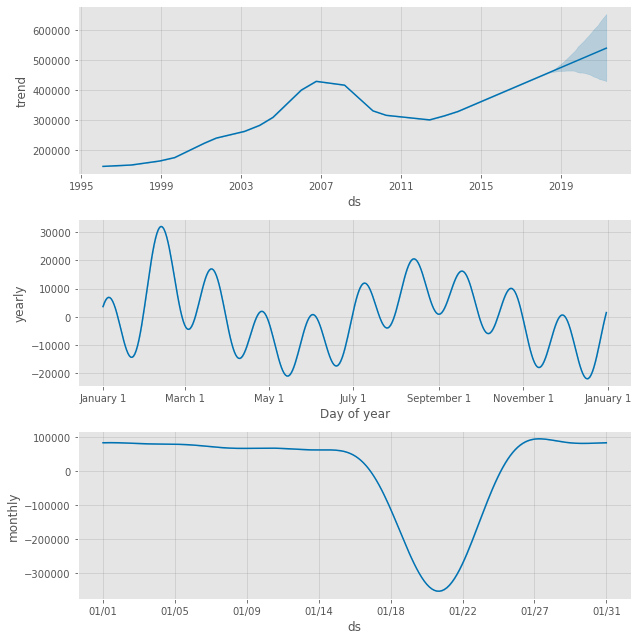

In [61]:
with plt.style.context('ggplot'):
    m.plot_components(forecast)

In [62]:
rmse(forecast.iloc[len(ts_proph) - 36:]['yhat'], test['y'])

18461.86878802158

In [63]:
test.mean(numeric_only=True)

y    591781.972222
dtype: float64

In [64]:
test.std(numeric_only=True)

y    11367.179322
dtype: float64

In [53]:
m = Prophet(interval_width=0.95,
            weekly_seasonality=False,
            daily_seasonality=False,seasonality_mode='multiplicative')
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(ts_proph)
future = m.make_future_dataframe(periods=36, freq='MS')
forecast = m.predict(future)

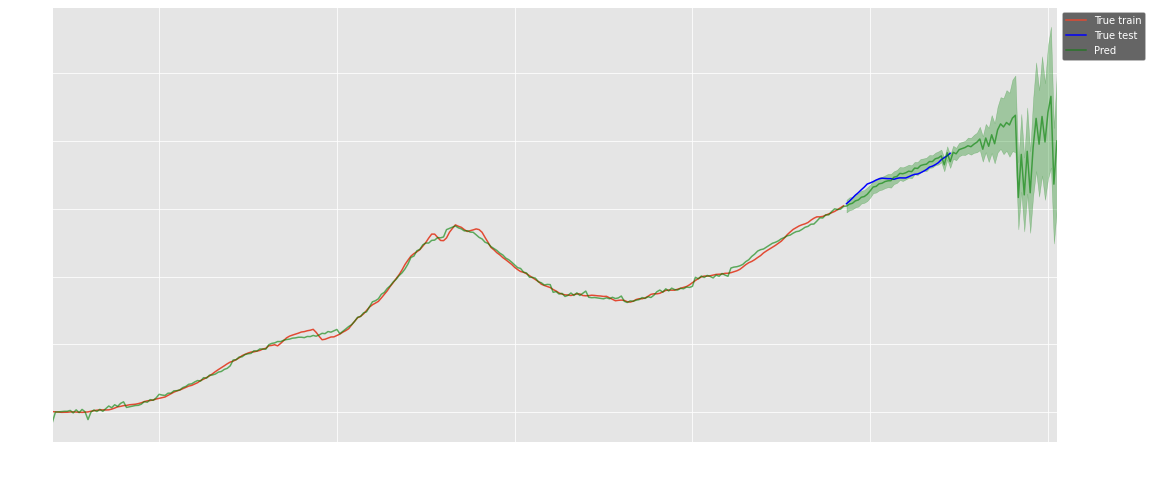

In [56]:
ax = train.plot(x='ds',
                y='y',
                label='True train',
                legend=True,
                figsize=(18, 8))
test.plot(x='ds', y='y', label='True test', legend=True, ax=ax, color='b')
forecast.plot(x='ds',
              y='yhat',
              label='Pred',
              legend=True,
              color='g',
              ax=ax,
              alpha=.6)
ax.fill_between(x=forecast.iloc[len(ts_proph) - 36:]['ds'].values,
                y1=forecast.iloc[len(ts_proph) - 36:]['yhat_lower'],
                y2=forecast.iloc[len(ts_proph) - 36:]['yhat_upper'],
                color='g',
                alpha=.3)

# ax.set_xlim((forecast.iloc[len(ts_proph) - 36]['ds'], forecast.iloc[-1]['ds']))
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

Not good yet

## RNN

In [ ]:
# gluon package